# HR Data Analysis
    a.	Preprocess and clean if necessary.
    b.	Build a model predicting “attriction”. 
    c.	Remember to comment your code and give rationales for models, algorithms, and approaches. 


## Import Packages

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load data

In [2]:
import pyodbc
import urllib
import sqlalchemy

'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))

In [3]:
df=pd.read_sql_table(r"HR_Employee_Attrition",engine_datahub)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes      Travel_Rarely       1102                   Sales                 1          2  Life Sciences              1               1                        2  Female          94               3         2        Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                         1             80                 0                  8                      0                1               6                   4                        0                     5
1   49        No  Travel_Frequently        279  Research & Development                 8          1  Life Sciences              1               2                        3    Male          61               2         2     Research Scientist                2       Married           5130        24907                   1      Y       No                 23                  4                         4             80                 1                 10                      3                3              10                   7                        1                     7
2   37       Yes      Travel_Rarely       1373  Research & Development                 2          2          Other              1               4                        4    Male          92               2         1  Laboratory Technician                3        Single           2090         2396                   6      Y      Yes                 15                  3                         2             80                 0                  7                      3                3               0                   0                        0                     0
3   33        No  Travel_Frequently       1392  Research & Development                 3          4  Life Sciences              1               5                        4  Female          56               3         1     Research Scientist                3       Married           2909        23159                   1      Y      Yes                 11                  3                         3             80                 0                  8                      3                3               8                   7                        3                     0
4   27        No      Travel_Rarely        591  Research & Development                 2          1        Medical              1               7                        1    Male          40               3         1  Laboratory Technician                2       Married           3468        16632                   9      Y       No                 12                  3                         4             80                 1                  6                      3                3               2                   2                        2                     2

## Exploratory Data Analysis(EDA)



### Check missing values and shape
Normally we need to clean the samples, i,e, impute missing values but in this case the data is pretty clean with no missing values. We also check the shape to make sure it matches the meta data info in the document. 

In [4]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(None, (1470, 35))

### Check Loan Status ratio
The samples are balanced so we can use "Accuracy" metric to measure the performance of the model

<AxesSubplot:>

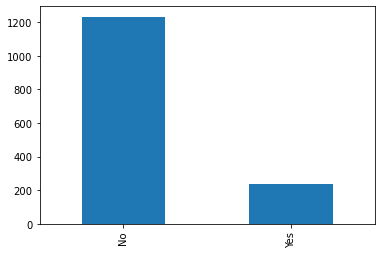

In [5]:

df['Attrition'].value_counts().plot(kind='bar')

### Describe the data

Categorical features/Dimensions 

In [6]:
cat_cols=df.select_dtypes(object).columns.tolist()
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

C:\Users\bdaon\AppData\Local\Temp/ipykernel_33752/323911355.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


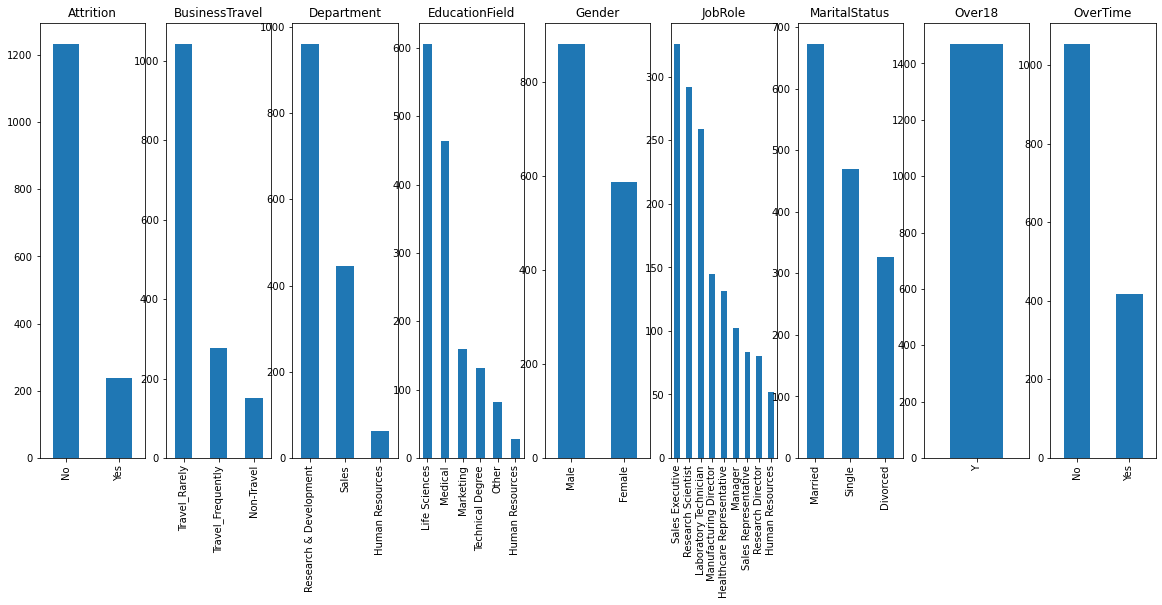

In [7]:
import matplotlib.pyplot as plt
categorical_features = cat_cols
# fig, ax = plt.subplots(1, len(categorical_features))
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind="bar", ax=ax[i],figsize=(20,8),rot=90,fontsize=10).set_title(categorical_feature)
fig.show()

Numeric data

#### Histogram
Histogram groups numeric data into bins, displaying the bins as segmented columns and summarize the distribution of a univariate data set. 

In [8]:

num_cols=df.select_dtypes('number').drop(['EmployeeNumber'],axis=1).columns.tolist()
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

C:\Users\bdaon\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\bdaon\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\bdaon\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\bdaon\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


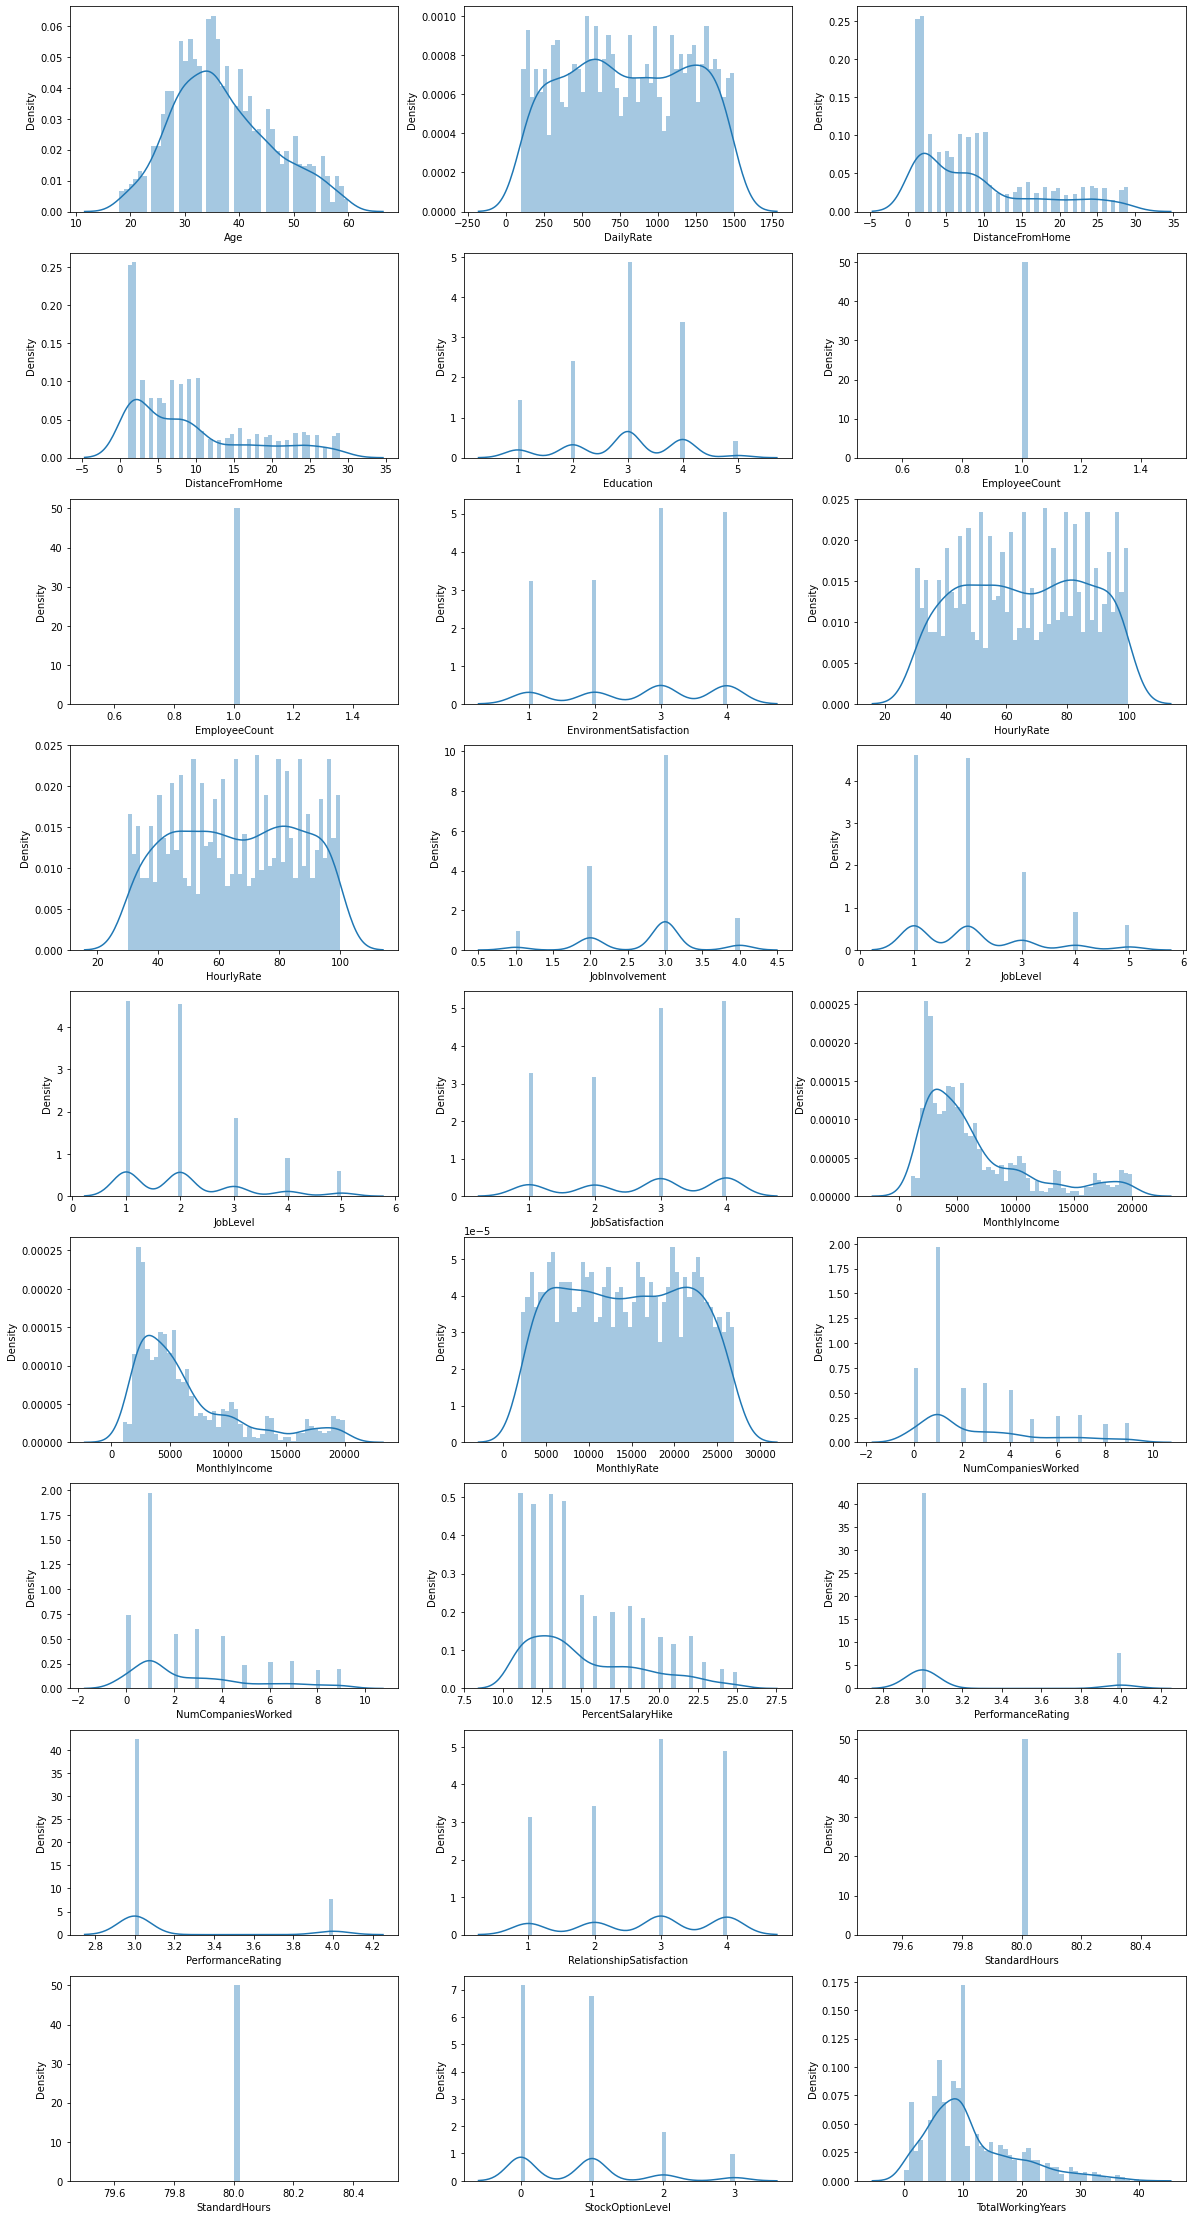

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(9, 3, figsize=(20, 40))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],bins=50)

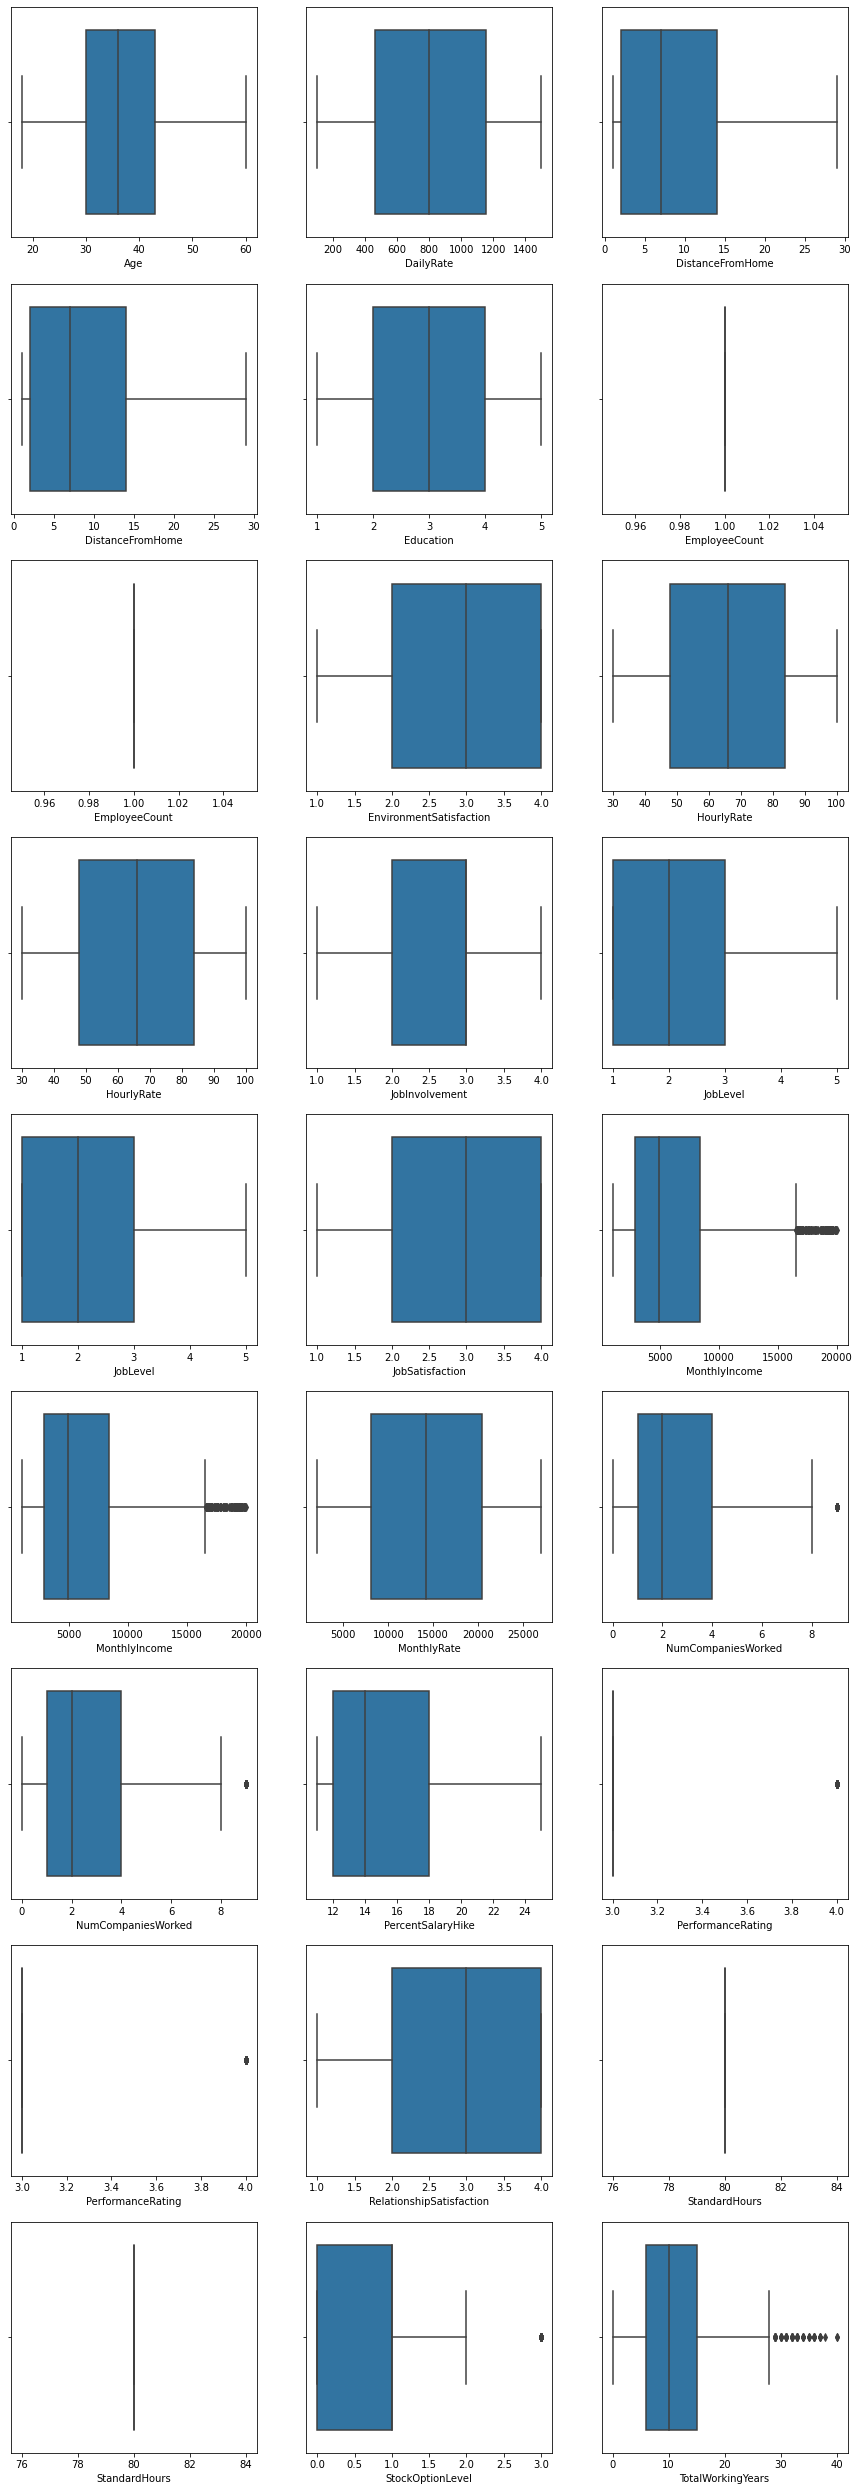

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(9, 3, figsize=(15, 45))

#plot the features except LOCATION_ID and Risk
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
#         sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v',showfliers=False)
        sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v')

In [11]:
df.describe()
# from the "max" row we can see feature PARA_A, PARA_B,Money_Value,History have some potential outliers. 

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0     1470.000000              1470.000000  1470.000000     1470.000000  1470.000000      1470.000000    1470.000000   1470.000000         1470.000000        1470.000000        1470.000000               1470.000000         1470.0       1470.000000        1470.000000            1470.000000      1470.000000     1470.000000         1470.000000              1470.000000           1470.000000
mean     36.923810   802.485714          9.192517     2.912925            1.0     1024.865306                 2.721769    65.891156        2.729932     2.063946         2.728571    6502.931293  14313.103401            2.693197          15.209524           3.153741                  2.712245           80.0          0.793878          11.279592               2.799320         2.761224        7.008163            4.229252                 2.187755              4.123129
std       9.135373   403.509100          8.106864     1.024165            0.0      602.024335                 1.093082    20.329428        0.711561     1.106940         1.102846    4707.956783   7117.786044            2.498009           3.659938           0.360824                  1.081209            0.0          0.852077           7.780782               1.289271         0.706476        6.126525            3.623137                 3.222430              3.568136
min      18.000000   102.000000          1.000000     1.000000            1.0        1.000000                 1.000000    30.000000        1.000000     1.000000         1.000000    1009.000000   2094.000000            0.000000          11.000000           3.000000                  1.000000           80.0          0.000000           0.000000               0.000000         1.000000        0.000000            0.000000                 0.000000              0.000000
25%      30.000000   465.000000          2.000000     2.000000            1.0      491.250000                 2.000000    48.000000        2.000000     1.000000         2.000000    2911.000000   8047.000000            1.000000          12.000000           3.000000                  2.000000           80.0          0.000000           6.000000               2.000000         2.000000        3.000000            2.000000                 0.000000              2.000000
50%      36.000000   802.000000          7.000000     3.000000            1.0     1020.500000                 3.000000    66.000000        3.000000     2.000000         3.000000    4919.000000  14235.500000            2.000000          14.000000           3.000000                  3.000000           80.0          1.000000          10.000000               3.000000         3.000000        5.000000            3.000000                 1.000000              3.000000
75%      43.000000  1157.000000         14.000000     4.000000            1.0     1555.750000                 4.000000    83.750000        3.000000     3.000000         4.000000    8379.000000  20461.500000            4.000000          18.000000           3.000000                  4.000000           80.0          1.000000          15.000000               3.000000         3.000000        9.000000            7.000000                 3.000000              7.000000
max      60.000000  1499.000000         29.000000     5.000000            1.0     2068.000000                 4.000000   100.000000        4.000000     5.000000         4.000000   19999.000000  26999.000000            9.000000          25.000000           4.000000                  4.000

### Clip, i.e. assigns values outside boundary to boundary values, the data to deal with outliers. 
 Outliers may distort how we see the data. They contain information too so it's a tradeoff; we lose some info but gain a better big picture of the data.

In [12]:
# here we use quantile 0.01 as lower limit and 0.99 upper.
df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0     1470.000000              1470.000000  1470.000000     1470.000000  1470.000000      1470.000000    1470.000000   1470.000000         1470.000000        1470.000000        1470.000000               1470.000000         1470.0       1470.000000        1470.000000            1470.000000      1470.000000     1470.000000         1470.000000              1470.000000           1470.000000
mean     36.918810   802.482993          9.192517     2.912925            1.0     1024.865306                 2.721769    65.891156        2.729932     2.063946         2.728571    6503.407177  14312.602483            2.693197          15.209524           3.153741                  2.712245           80.0          0.793878          11.268707               2.799320         2.761224        6.980272            4.214966                 2.178912              4.102721
std       9.099146   403.260237          8.106864     1.024165            0.0      602.024335                 1.093082    20.329428        0.711561     1.106940         1.102846    4700.530849   7112.052810            2.498009           3.659938           0.360824                  1.081209            0.0          0.852077           7.710507               1.289271         0.706476        6.004901            3.576459                 3.188426              3.503717
min      19.000000   117.000000          1.000000     1.000000            1.0        1.000000                 1.000000    30.000000        1.000000     1.000000         1.000000    1382.460000   2325.070000            0.000000          11.000000           3.000000                  1.000000           80.0          0.000000           1.000000               0.000000         1.000000        0.000000            0.000000                 0.000000              0.000000
25%      30.000000   465.000000          2.000000     2.000000            1.0      491.250000                 2.000000    48.000000        2.000000     1.000000         2.000000    2911.000000   8047.000000            1.000000          12.000000           3.000000                  2.000000           80.0          0.000000           6.000000               2.000000         2.000000        3.000000            2.000000                 0.000000              2.000000
50%      36.000000   802.000000          7.000000     3.000000            1.0     1020.500000                 3.000000    66.000000        3.000000     2.000000         3.000000    4919.000000  14235.500000            2.000000          14.000000           3.000000                  3.000000           80.0          1.000000          10.000000               3.000000         3.000000        5.000000            3.000000                 1.000000              3.000000
75%      43.000000  1157.000000         14.000000     4.000000            1.0     1555.750000                 4.000000    83.750000        3.000000     3.000000         4.000000    8379.000000  20461.500000            4.000000          18.000000           3.000000                  4.000000           80.0          1.000000          15.000000               3.000000         3.000000        9.000000            7.000000                 3.000000              7.000000
max      58.310000  1485.000000         29.000000     5.000000            1.0     2068.000000                 4.000000   100.000000        4.000000     5.000000         4.000000   19626.310000  26704.240000            9.000000          25.000000           4.000000                  4.000

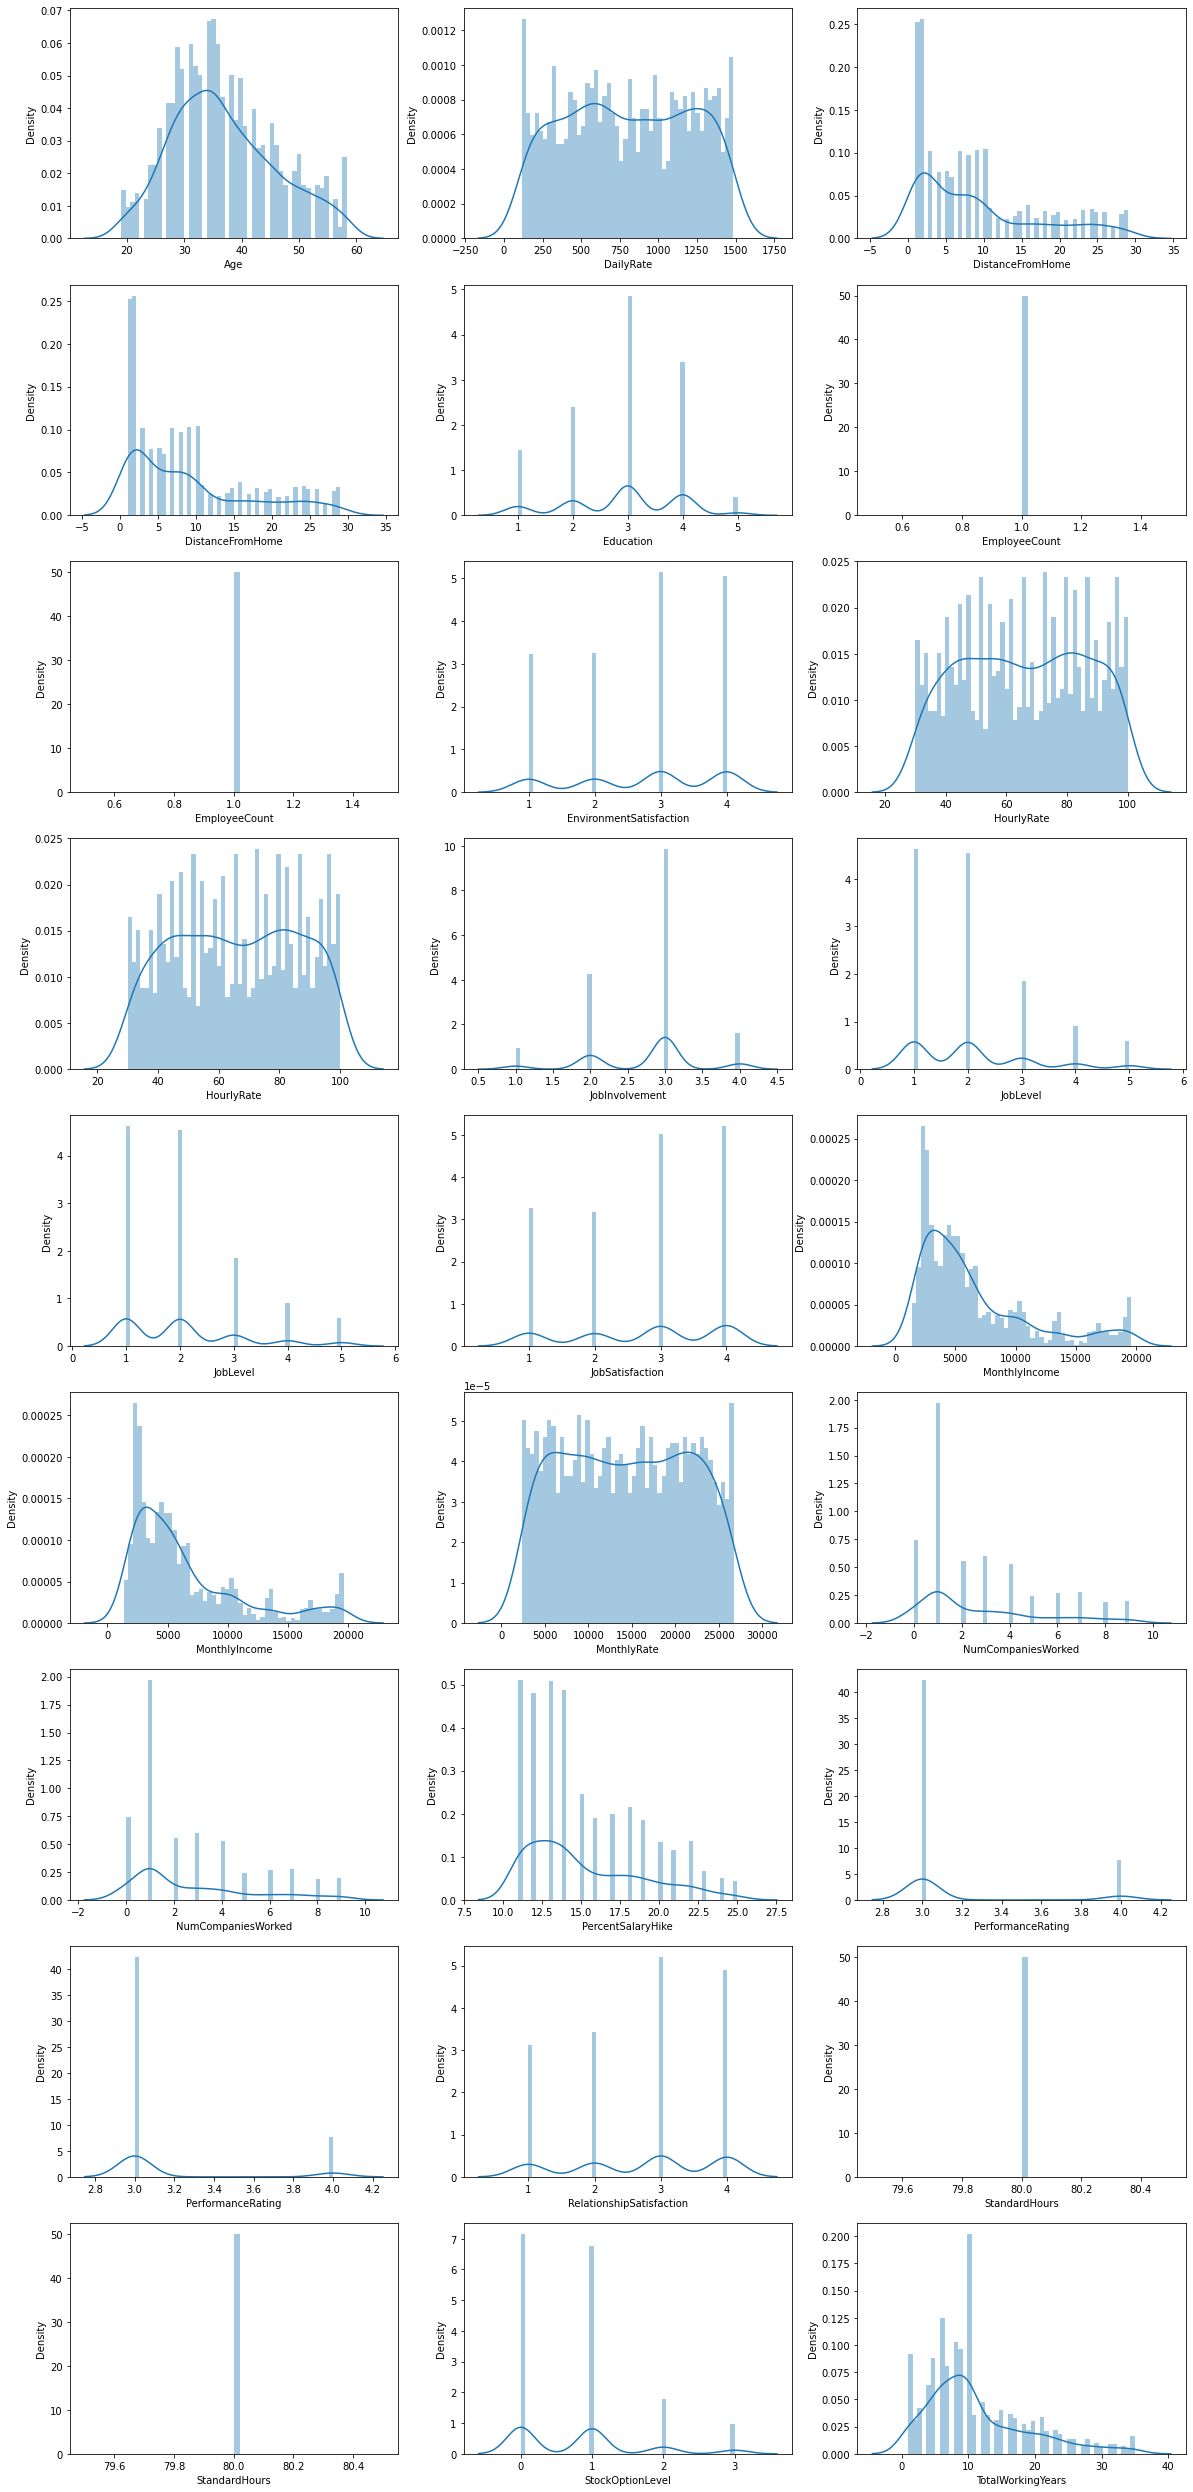

In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(9, 3, figsize=(20, 45))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.distplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],bins=50)

### Boxplot the data
Boxplot shows the shape of the distribution, its central value, and its variability

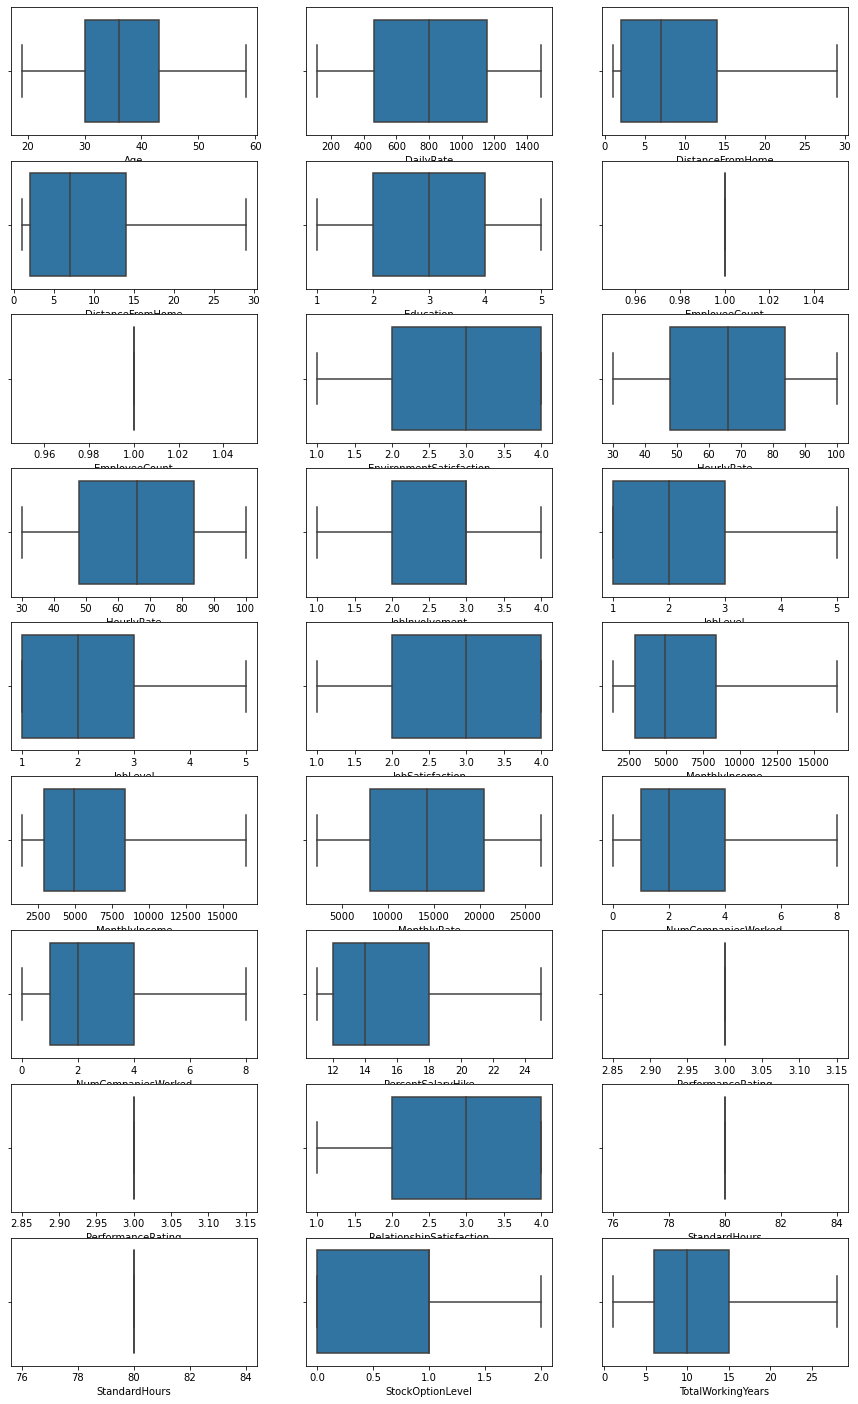

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)

fig, ax = plt.subplots(9, 3, figsize=(15, 25))

#plot the features except LOCATION_ID and Risk
for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        sns.boxplot(df[df[num_cols].columns[i*2+j]], ax=ax[i][j],orient='v',showfliers=False)

#### Explain the Boxplots:
The boxplots tell similar story as the Histograms. None of the distributions seem normal.

### Correlation heatmap
Correlation heatmap allows us to see relations between features/attributes. The higher the absolute coefficient, the stronger the correlation is. 

In [15]:
# import seaborn as sns
# df=df.query('`Loan ID`.notnull()', engine='python')
# sns.pairplot(df.sample(frac=0.01, replace=True).reset_index(drop=True),plot_kws=dict(marker="+", linewidth=1))

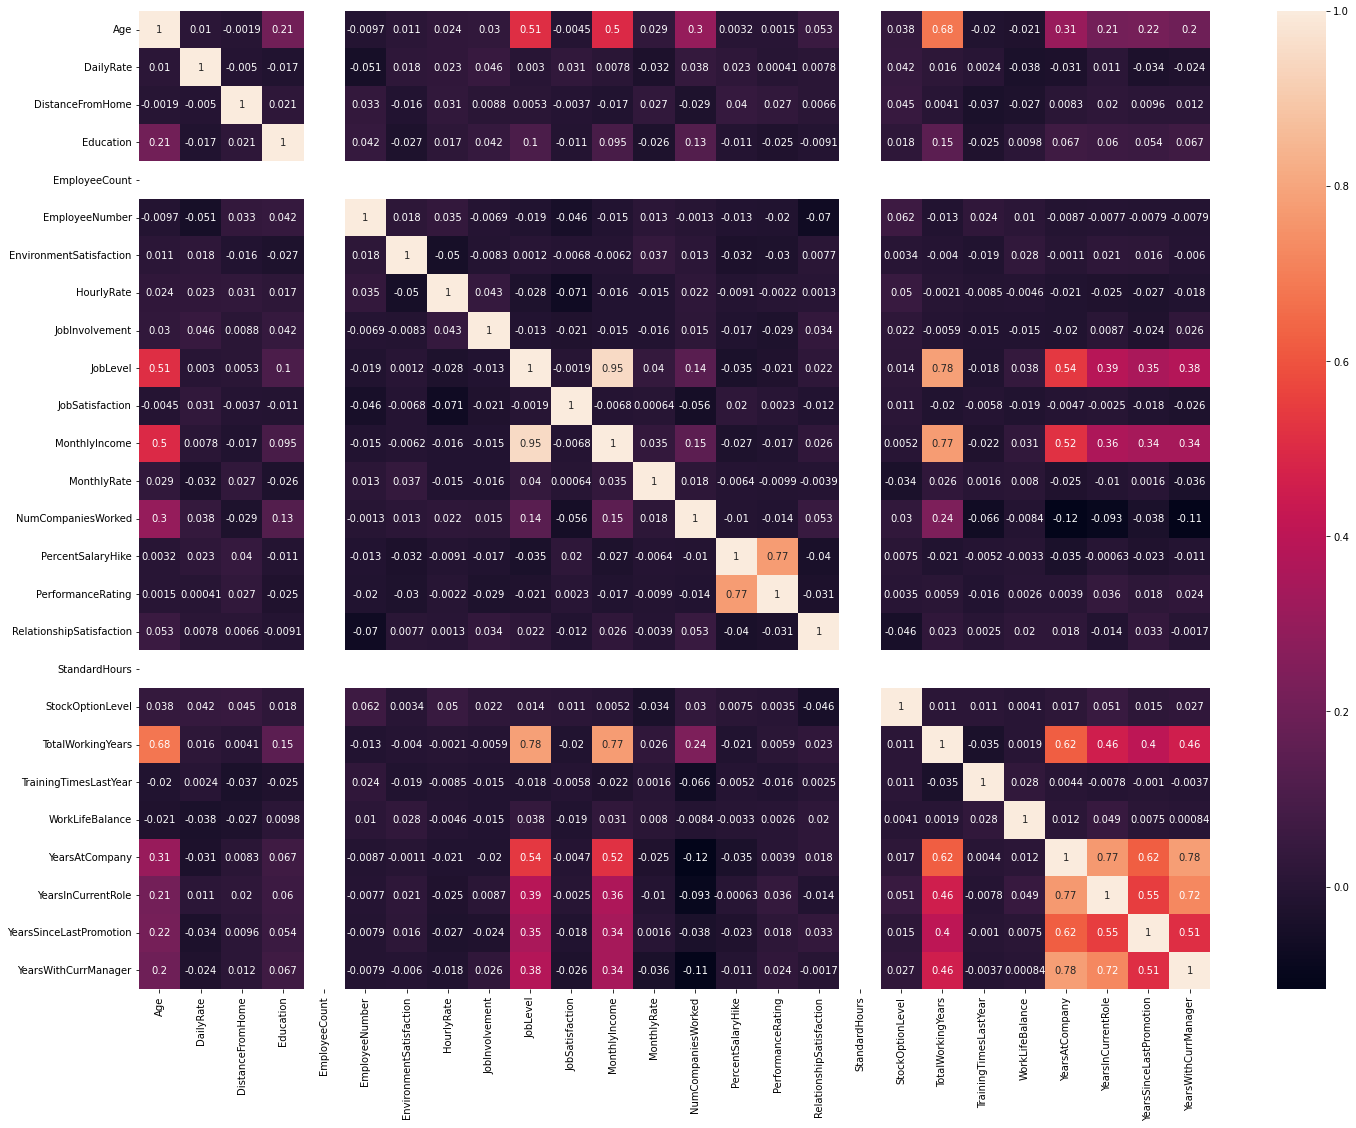

In [16]:

# df['Loan Status encoded']=np.where(df['Loan Status']=='Fully Paid',0,1)
corrMatrix = df.corr()
plt.figure(figsize = (24,18))
ax=(sns.heatmap(corrMatrix, annot=True))
plt.show()

Chi Square p value = 5.608614476449931e-06


Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156

Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.920000  0.080000
Travel_Frequently  0.750903  0.249097
Travel_Rarely      0.850431  0.149569

<AxesSubplot:xlabel='Attrition', ylabel='BusinessTravel'>

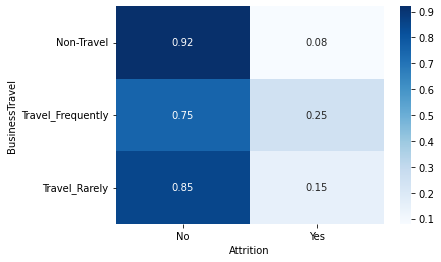

In [17]:
from scipy.stats import chisquare,chi2_contingency

v1=df['BusinessTravel']

v2=df['Attrition']
# g, p, dof, expctd=chi2_contingency(pd.crosstab(v1, v2))
print('Chi Square p value =' , chi2_contingency(pd.crosstab(v1, v2))[1])

display(pd.crosstab(v1, v2))
display(pd.crosstab(v1, v2,normalize='index'))
# sns.heatmap(pd.crosstab(v1, v2), annot=True)
sns.heatmap(pd.crosstab(v1, v2,normalize='index'), annot=True,cmap="Blues")


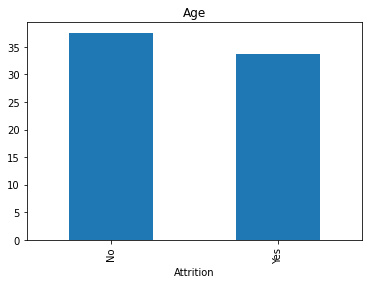

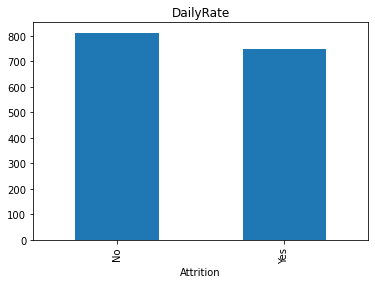

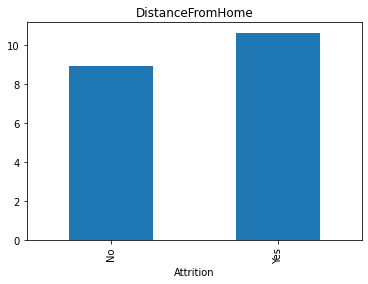

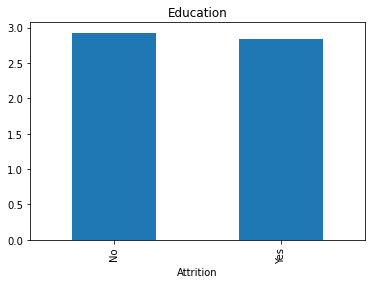

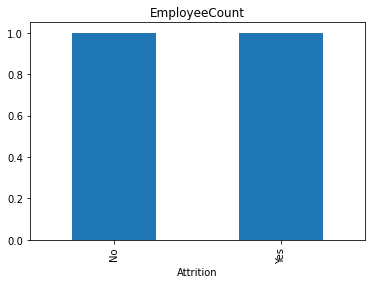

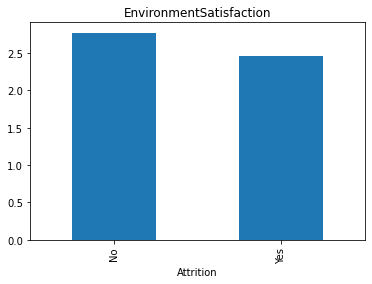

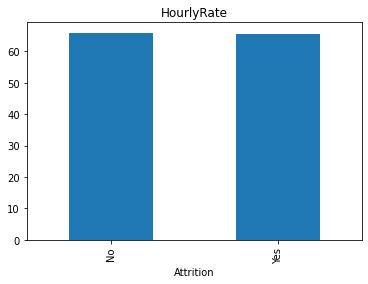

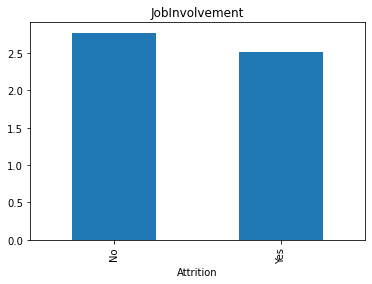

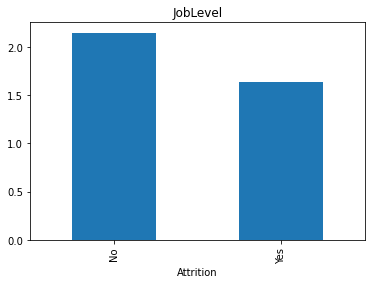

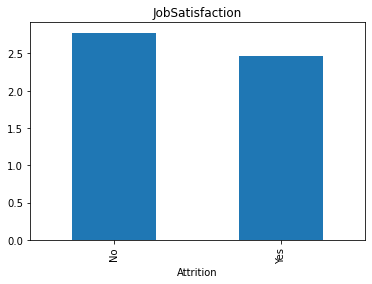

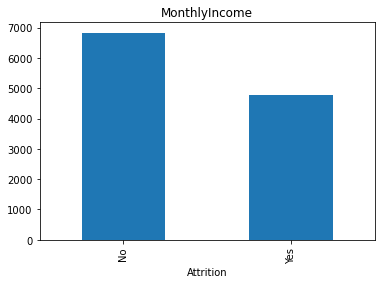

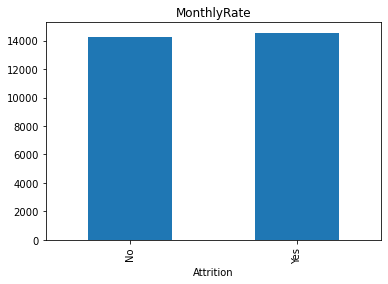

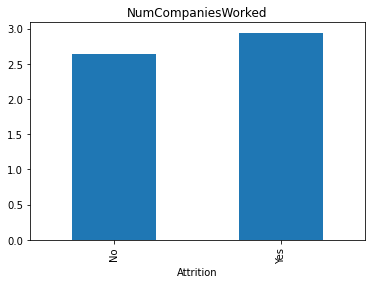

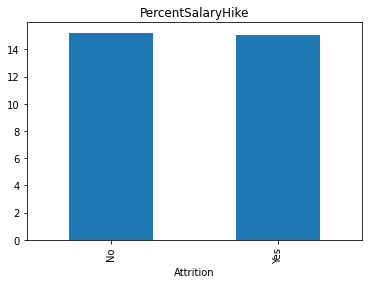

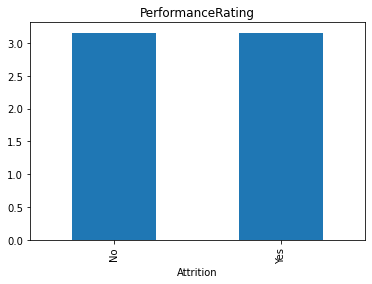

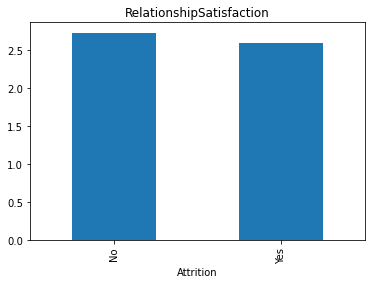

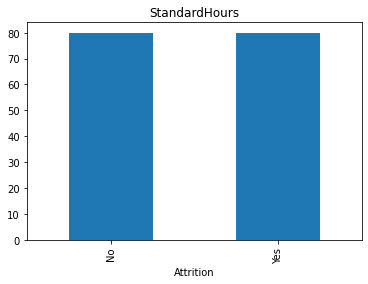

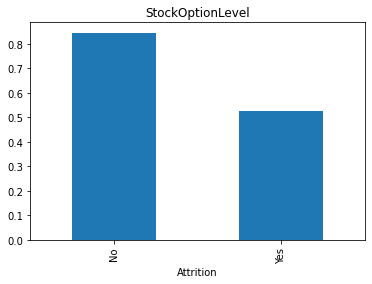

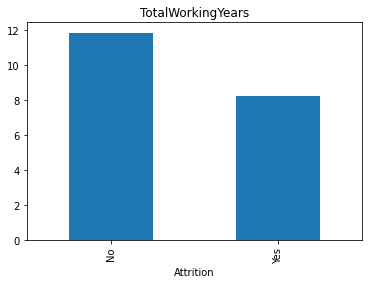

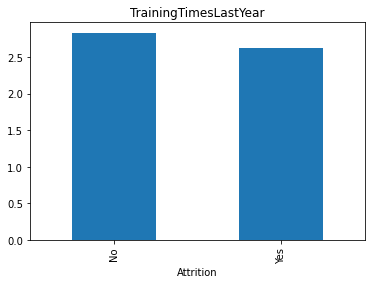

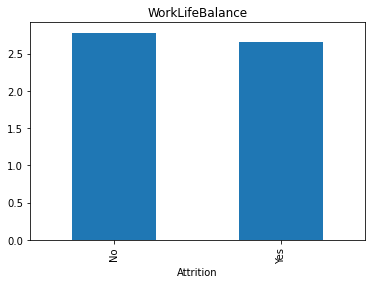

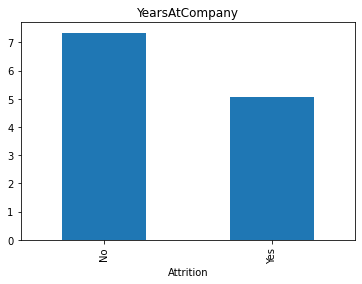

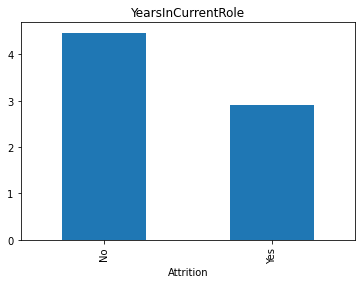

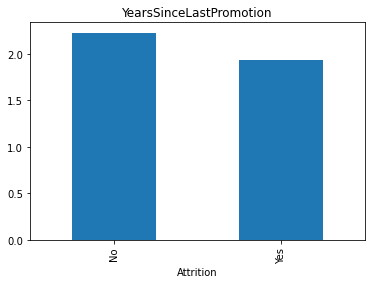

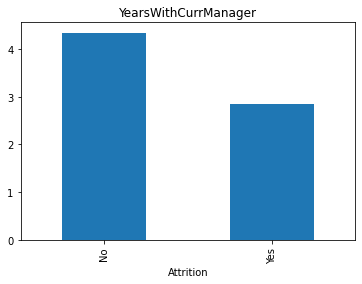

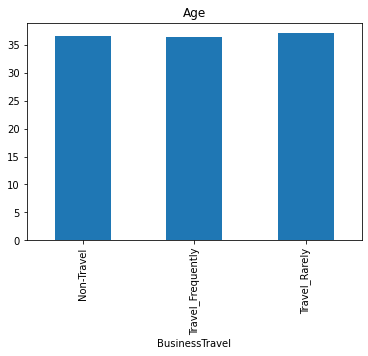

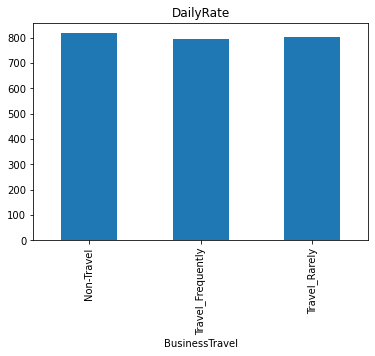

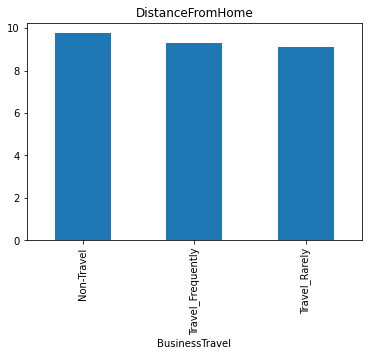

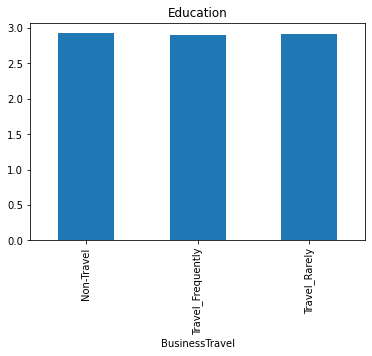

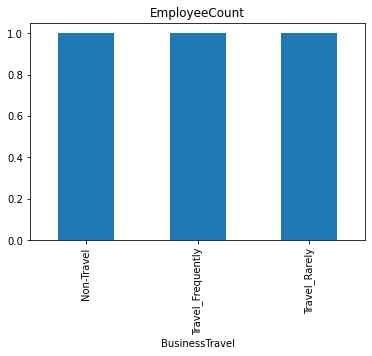

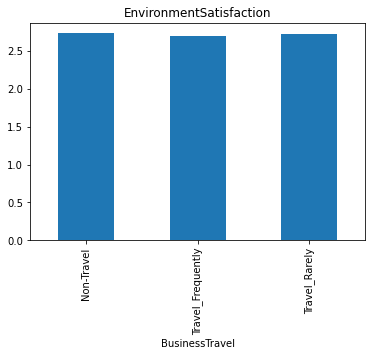

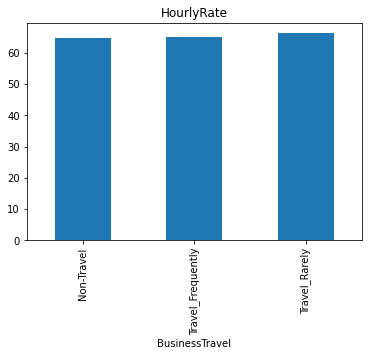

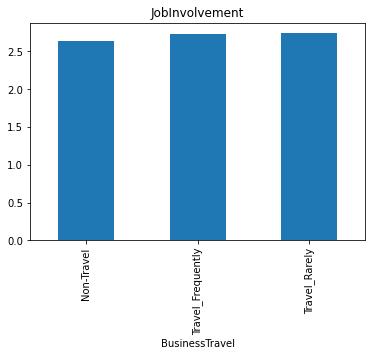

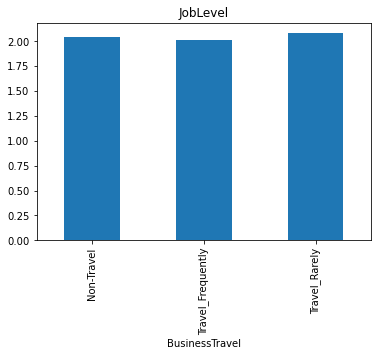

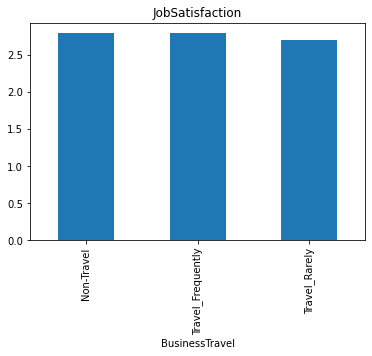

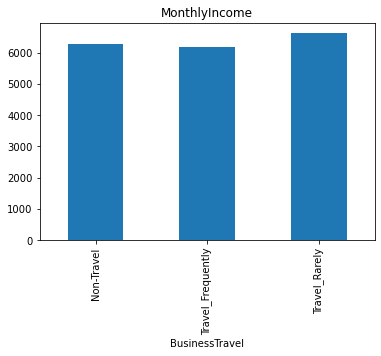

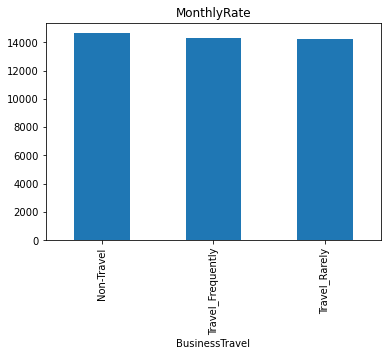

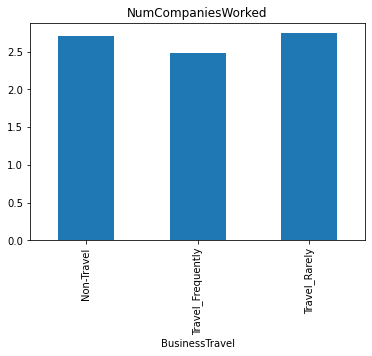

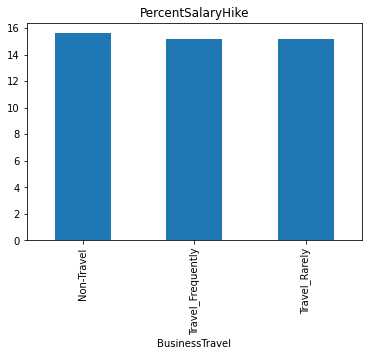

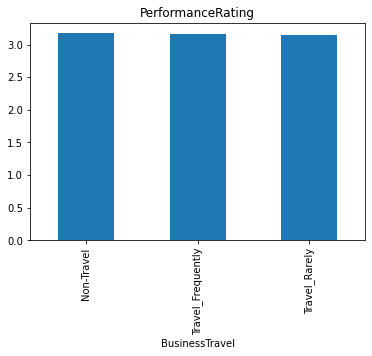

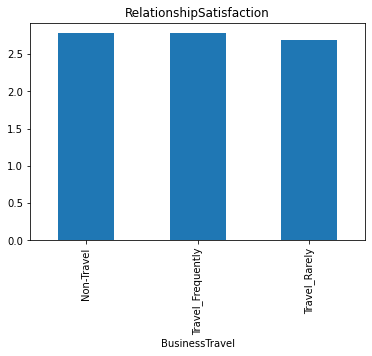

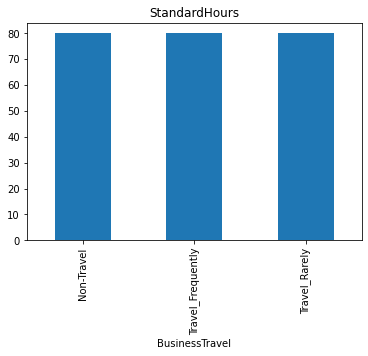

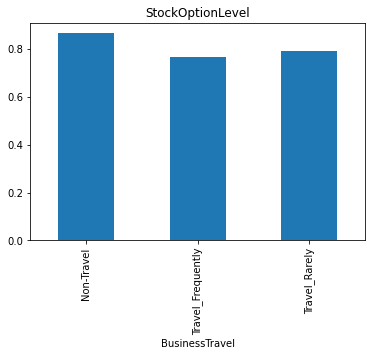

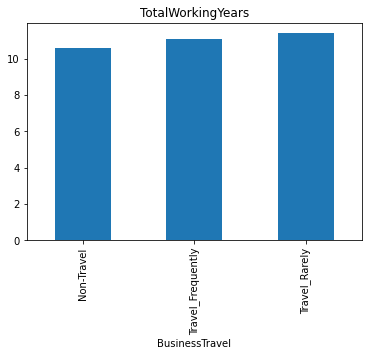

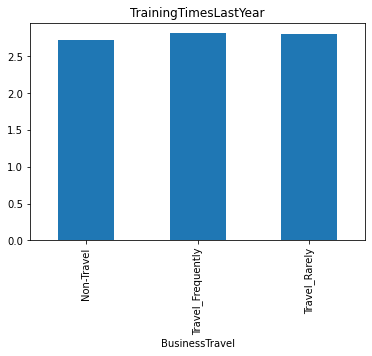

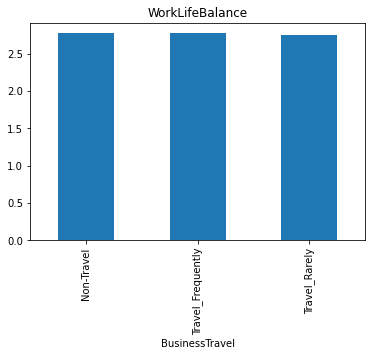

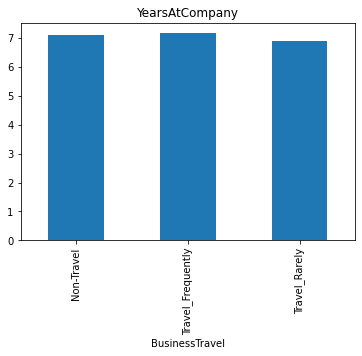

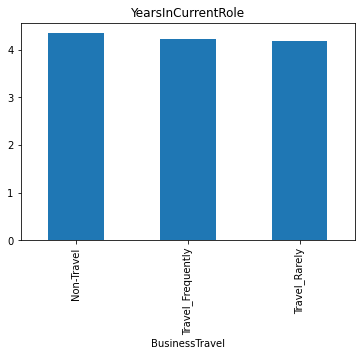

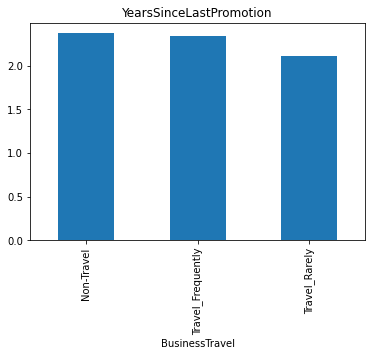

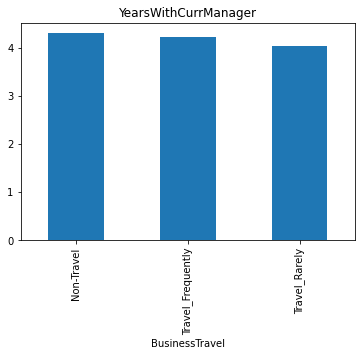

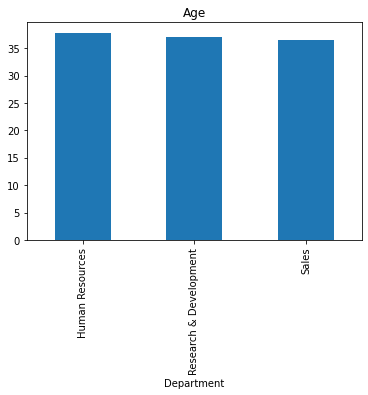

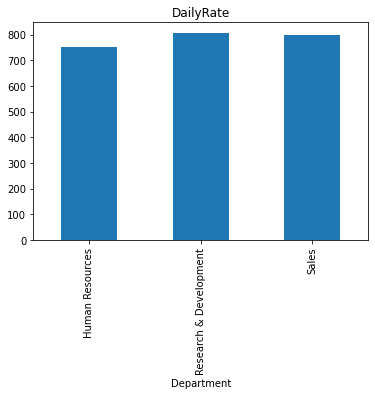

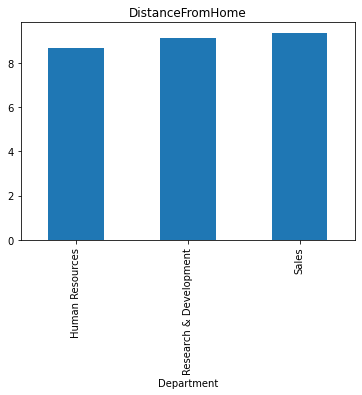

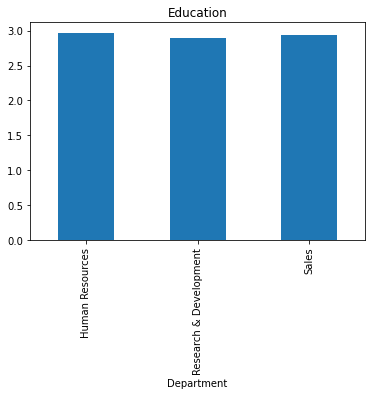

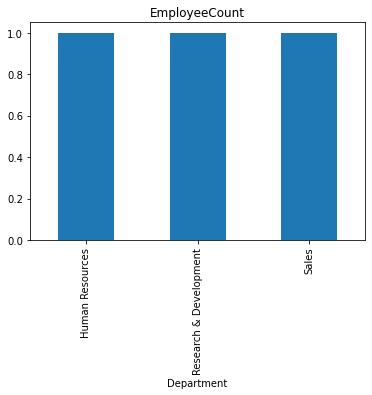

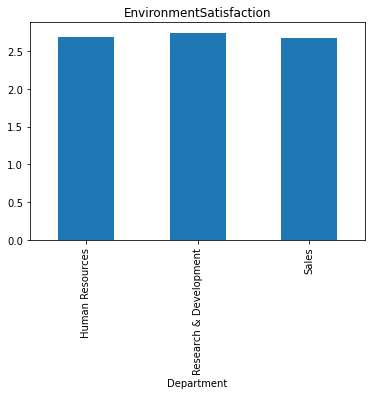

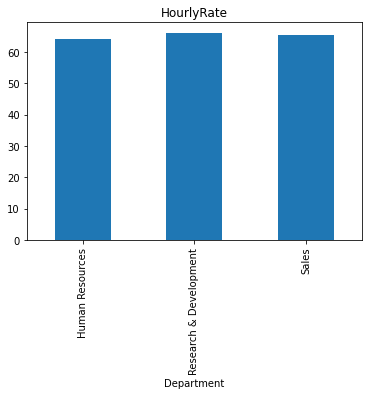

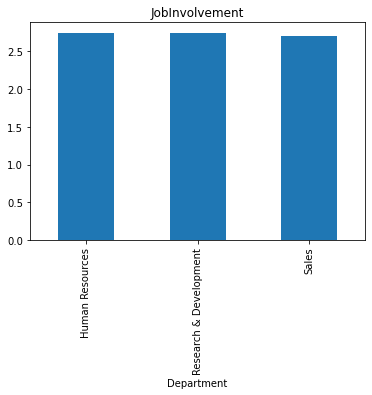

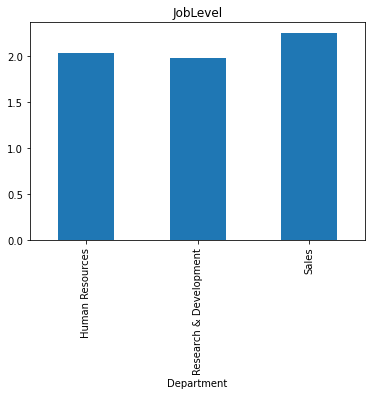

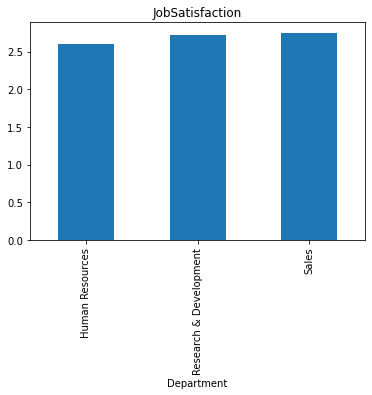

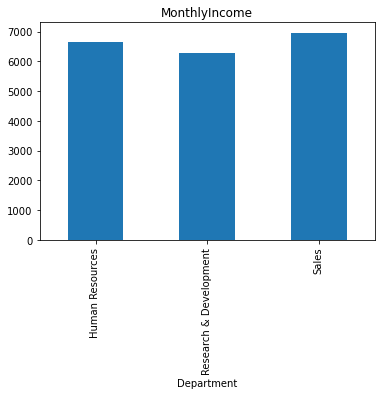

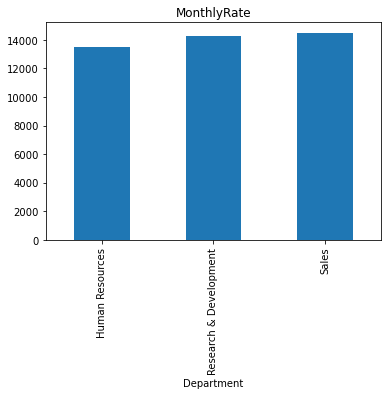

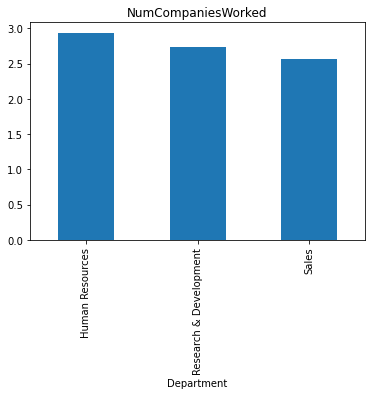

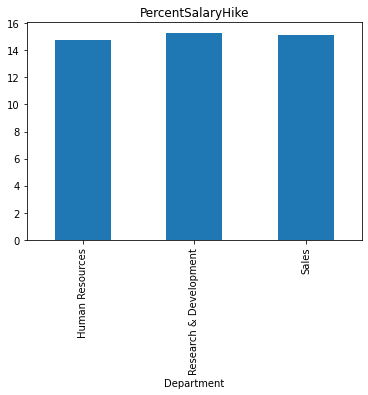

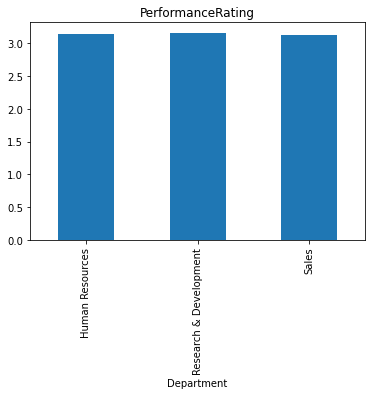

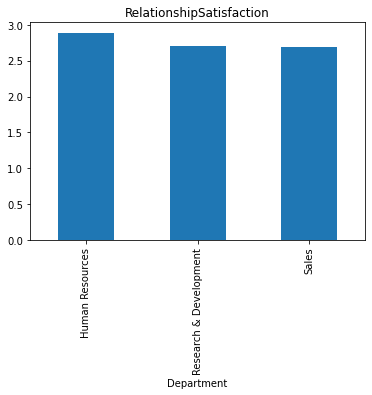

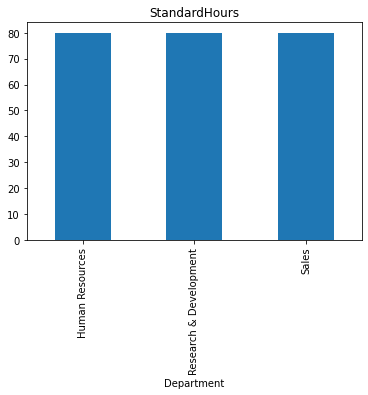

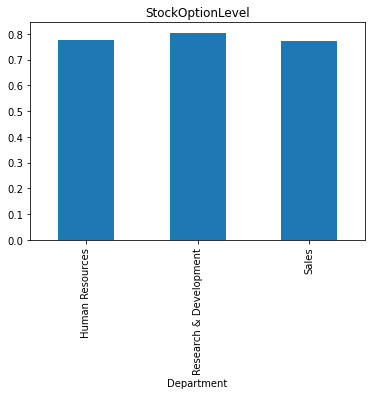

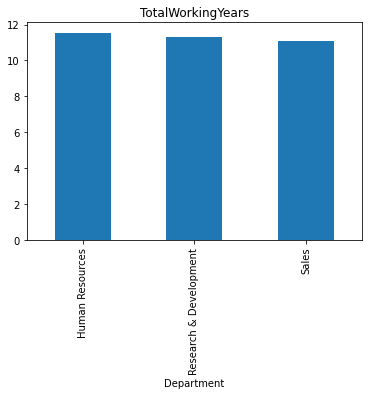

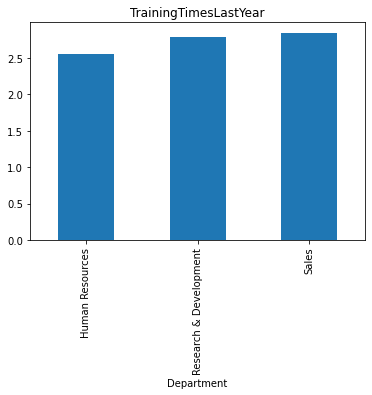

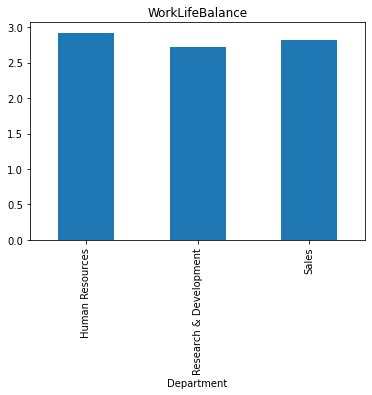

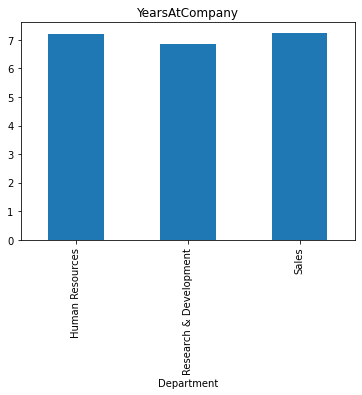

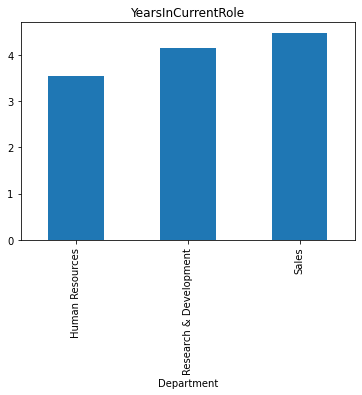

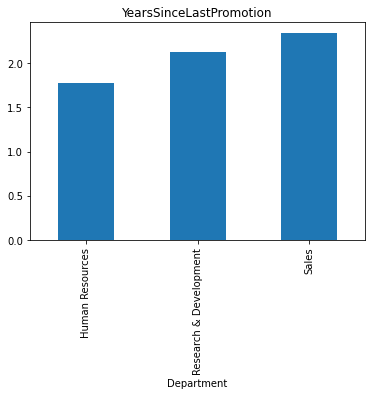

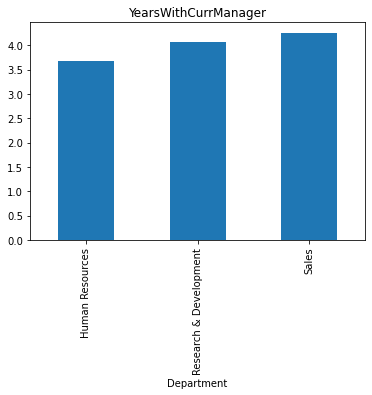

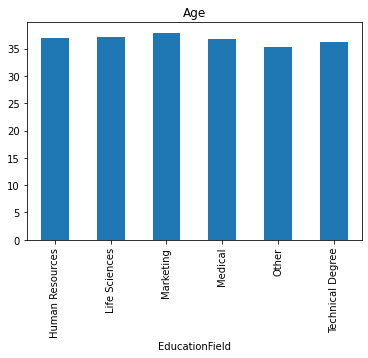

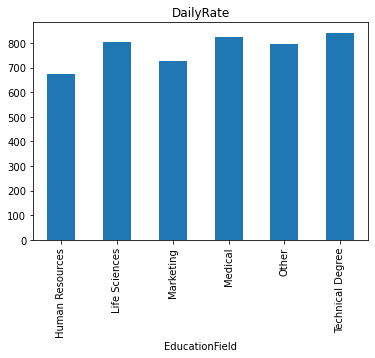

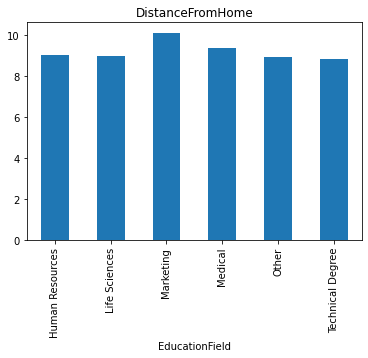

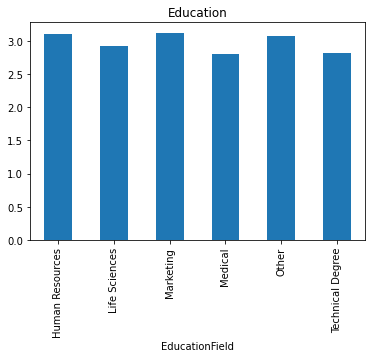

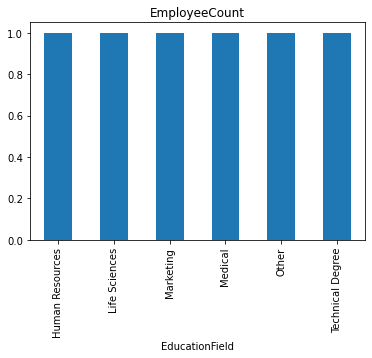

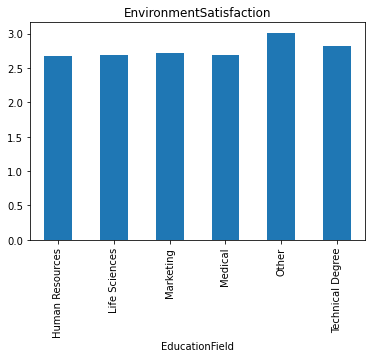

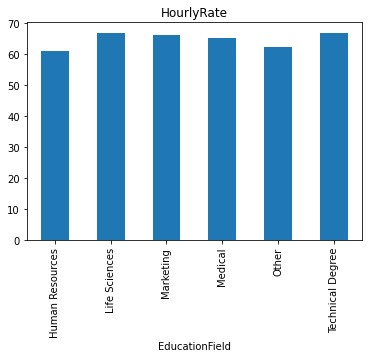

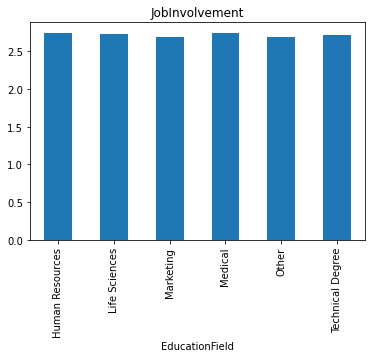

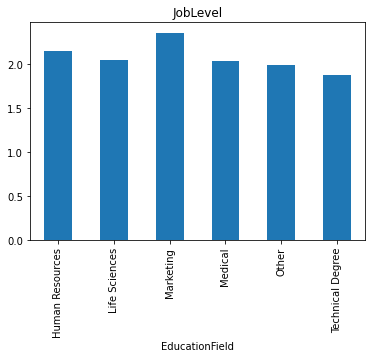

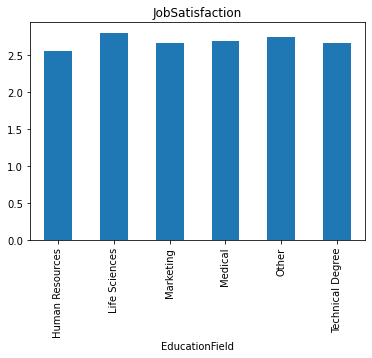

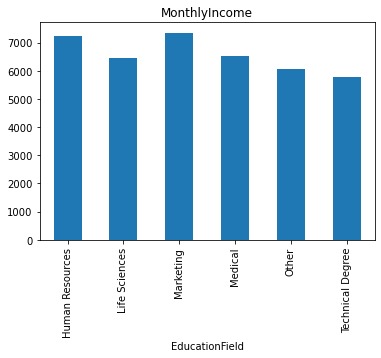

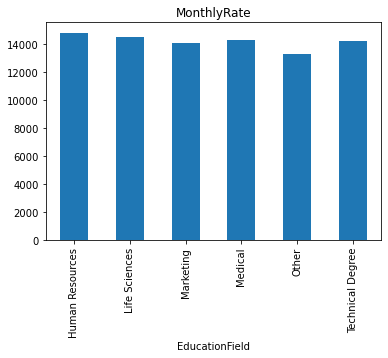

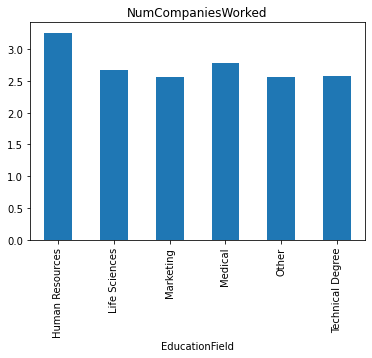

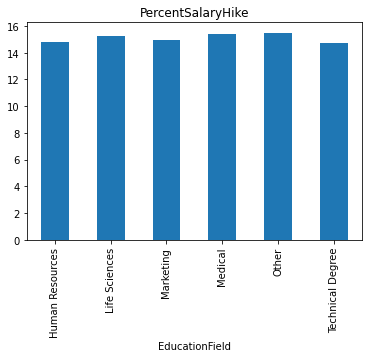

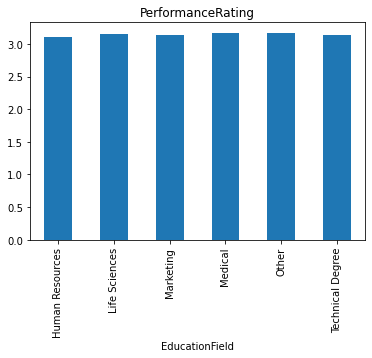

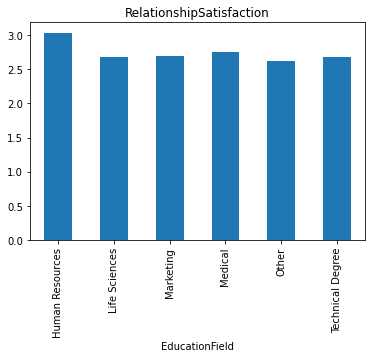

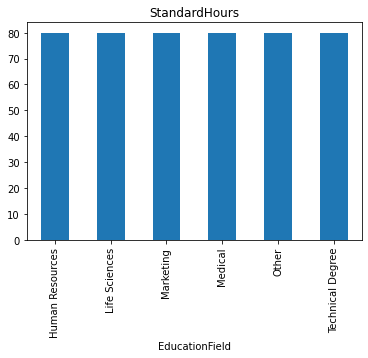

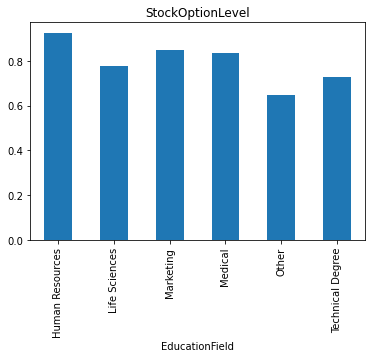

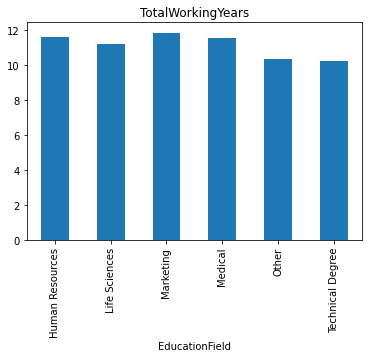

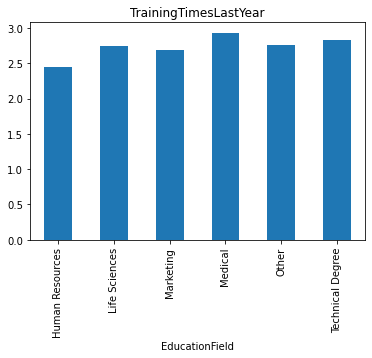

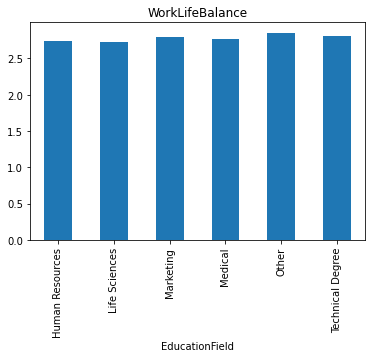

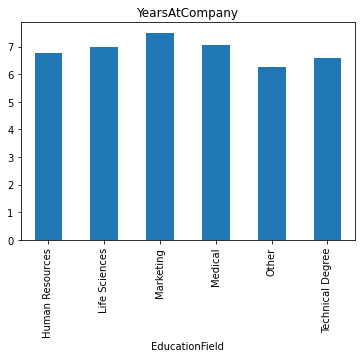

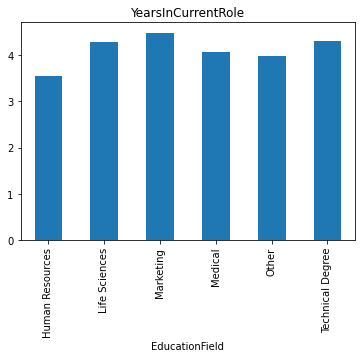

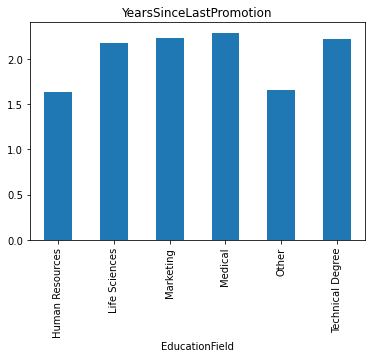

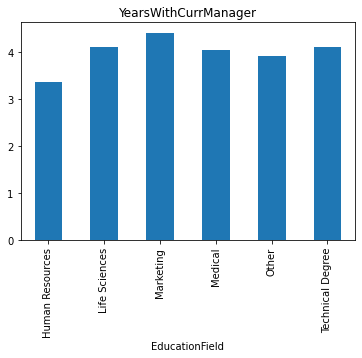

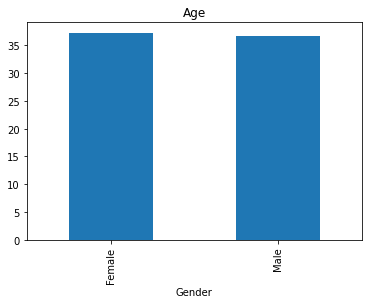

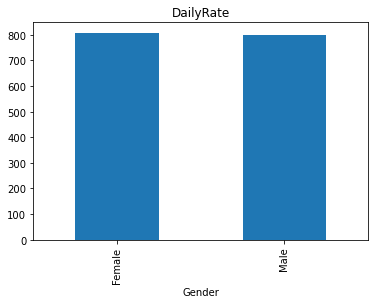

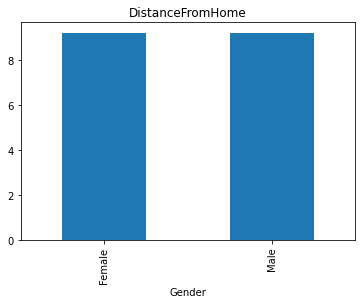

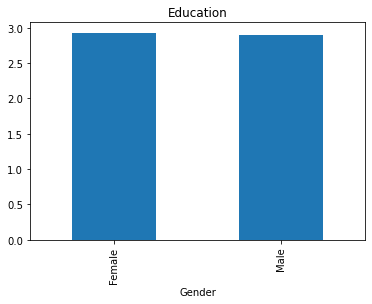

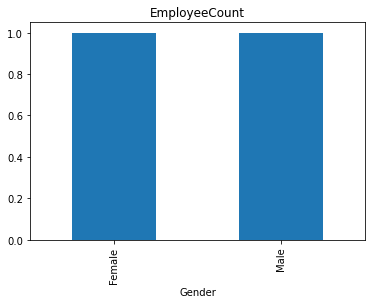

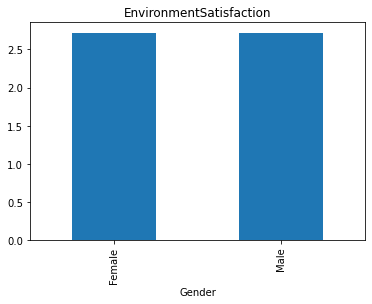

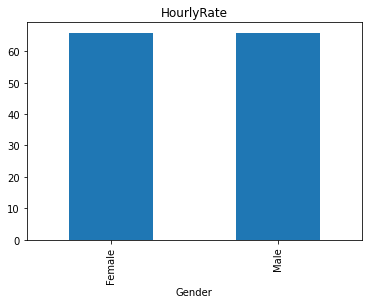

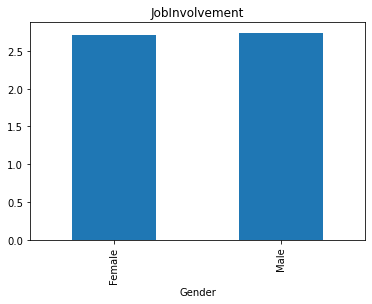

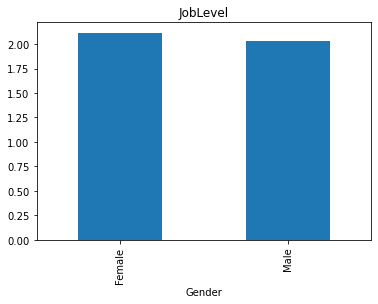

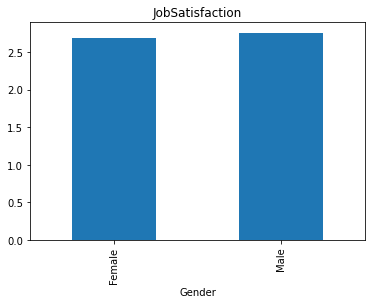

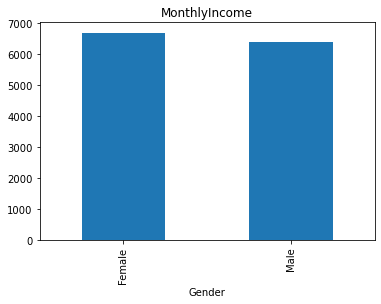

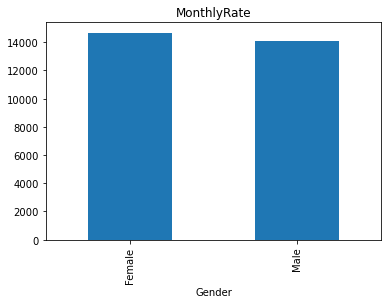

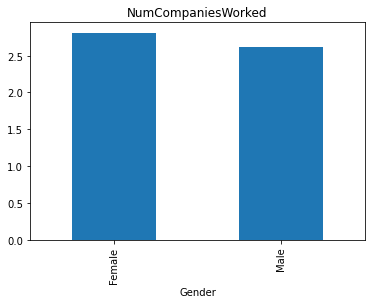

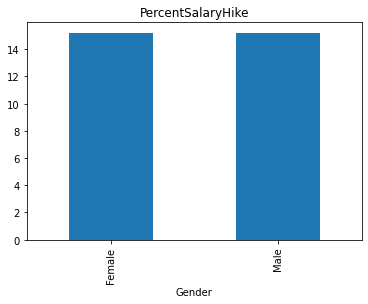

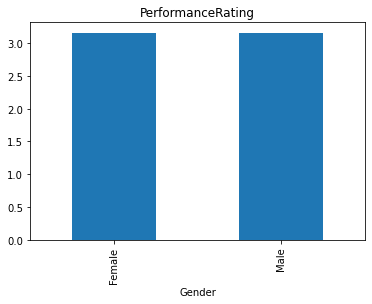

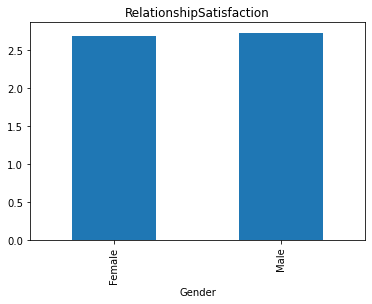

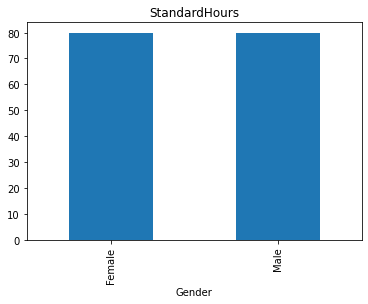

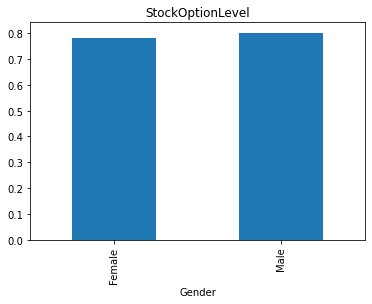

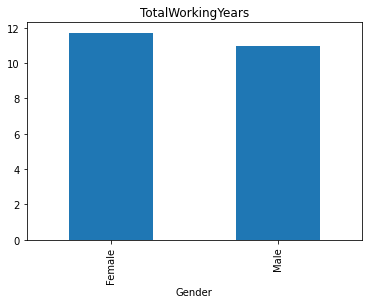

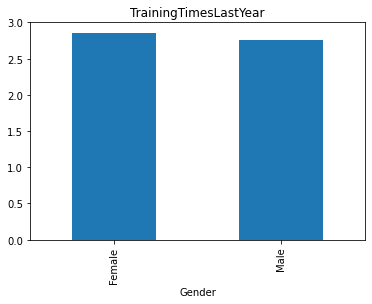

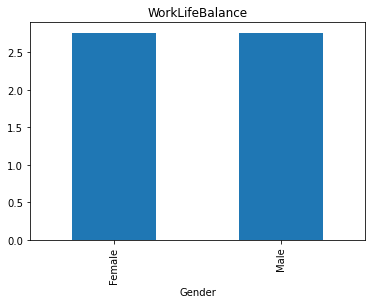

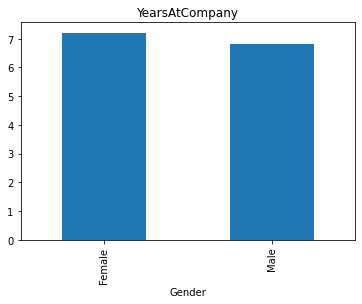

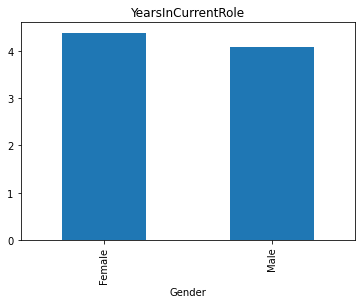

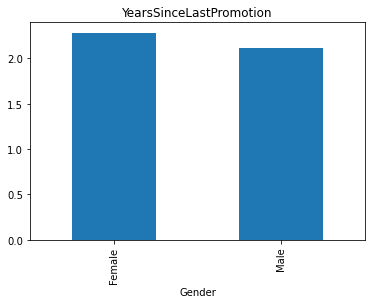

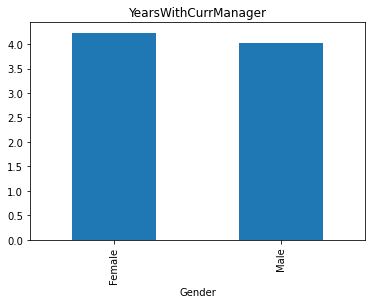

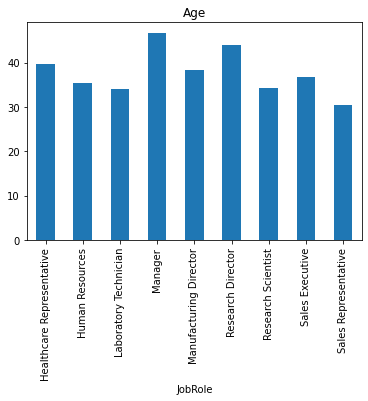

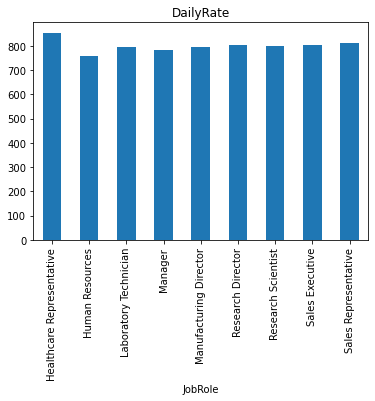

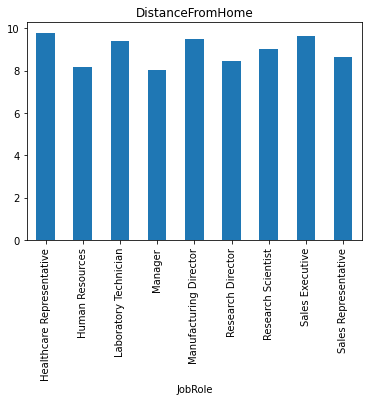

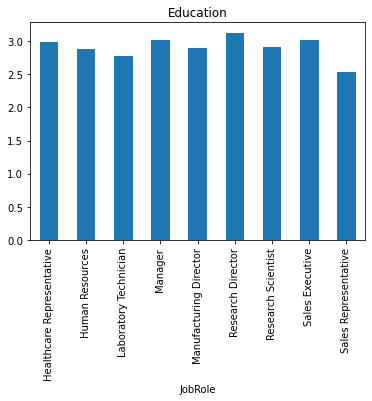

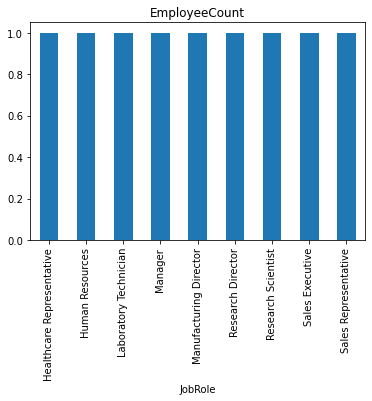

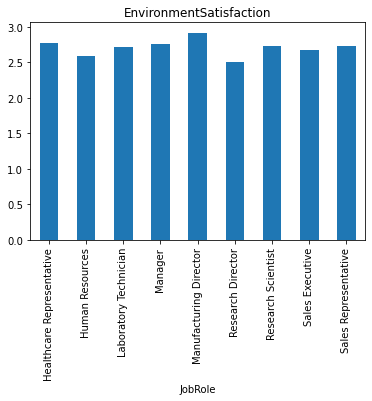

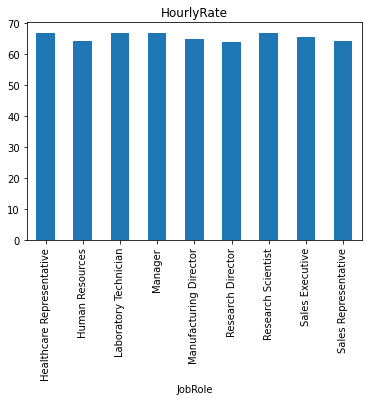

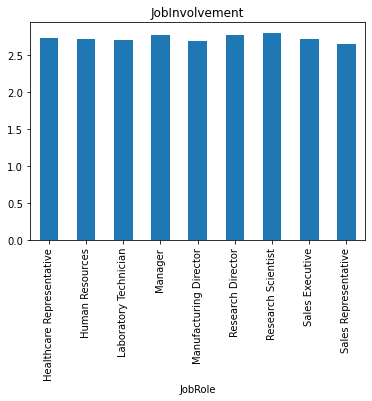

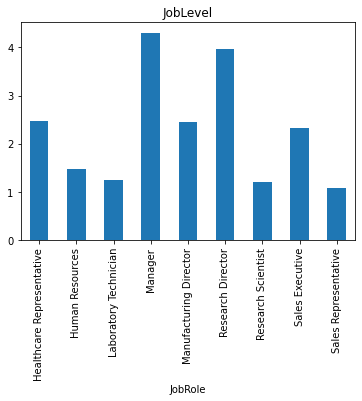

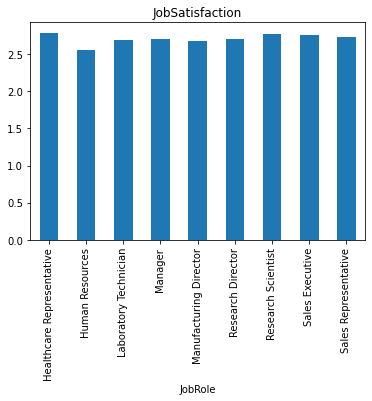

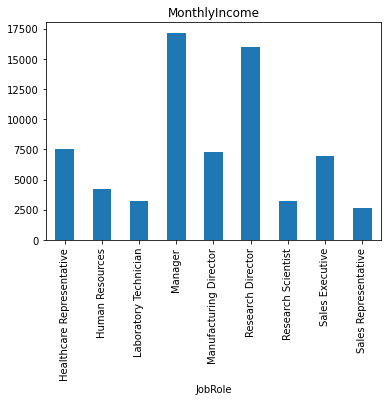

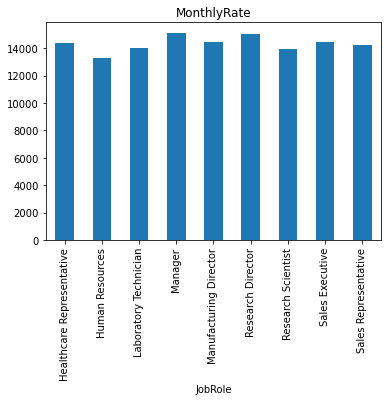

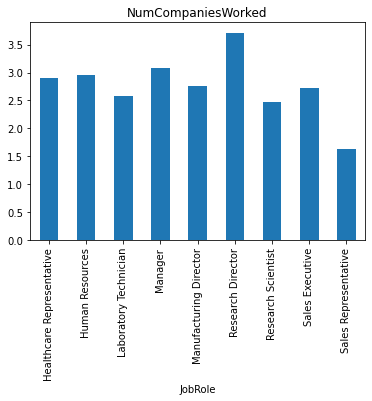

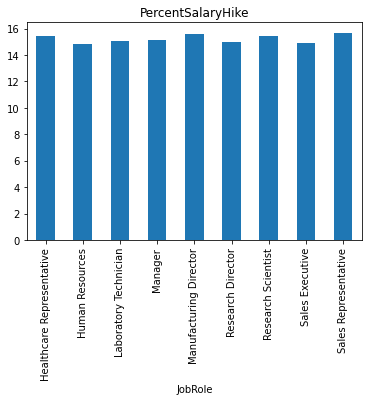

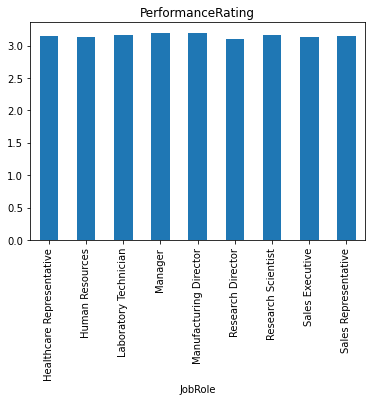

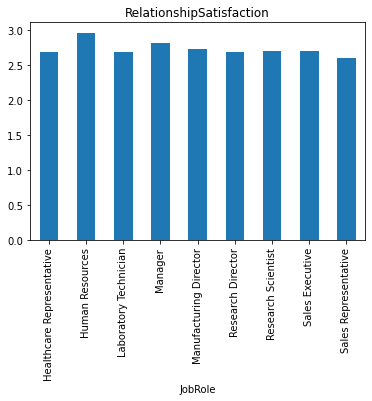

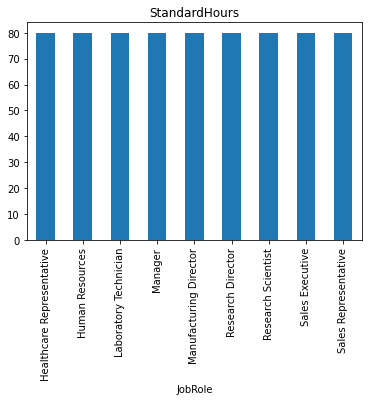

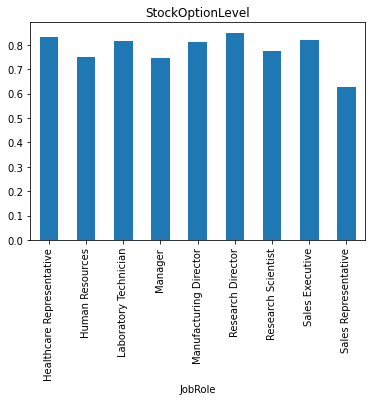

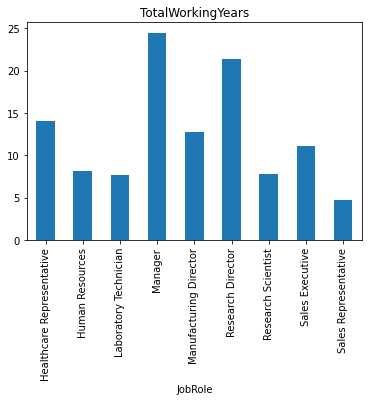

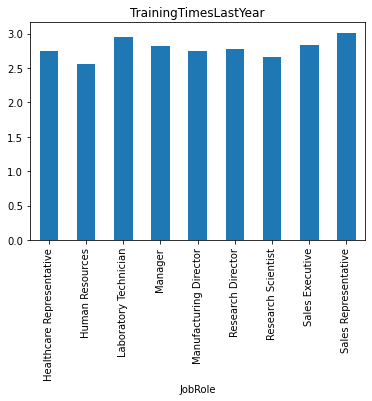

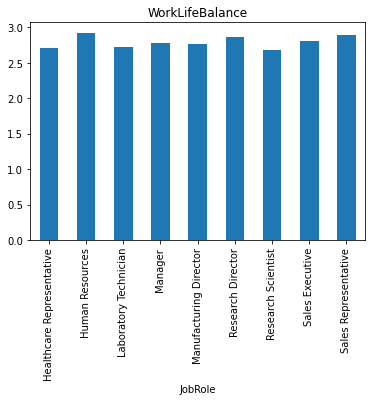

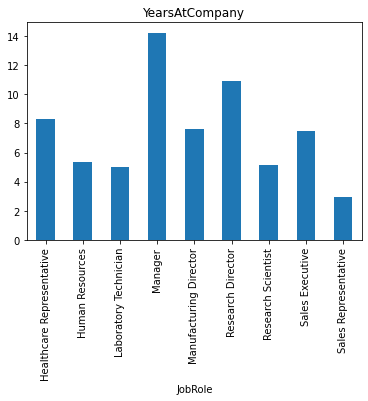

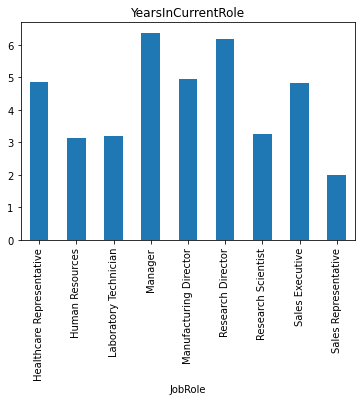

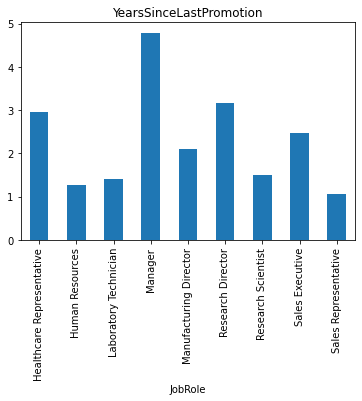

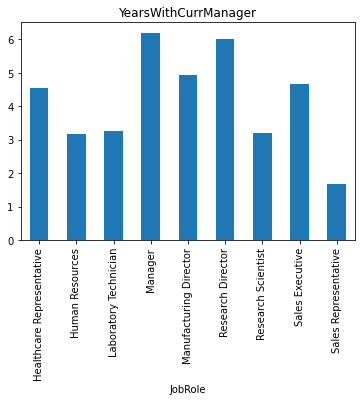

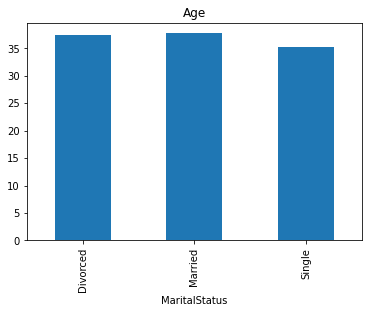

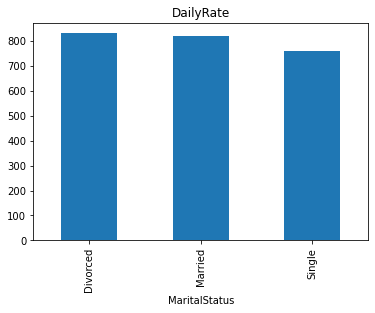

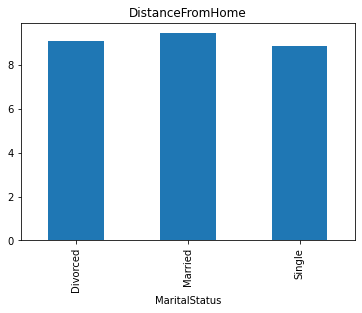

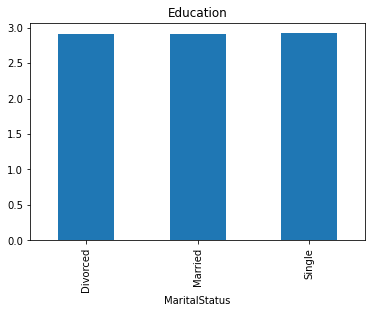

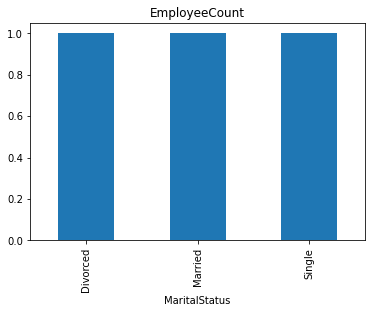

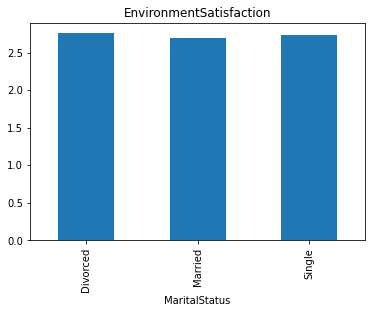

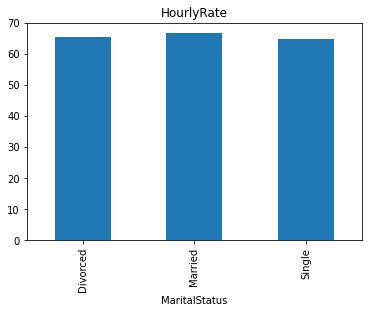

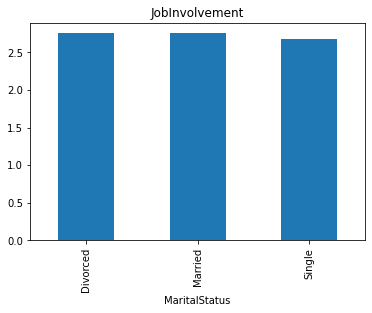

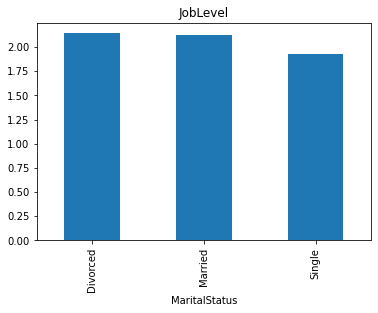

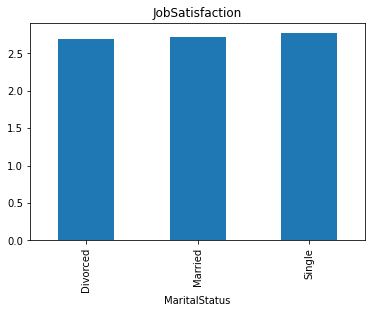

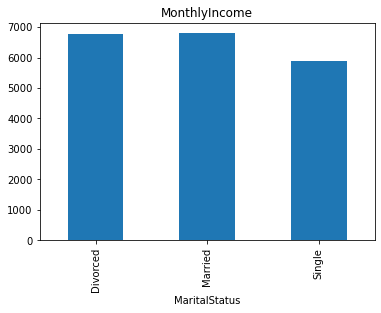

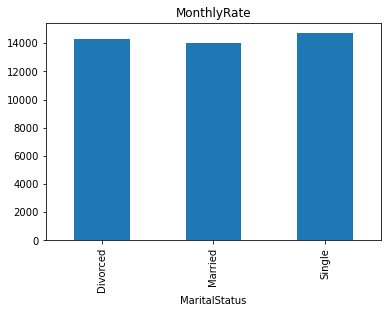

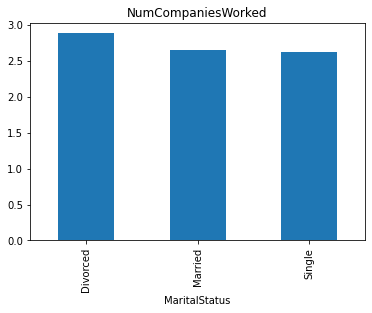

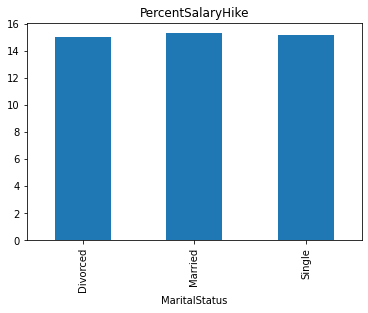

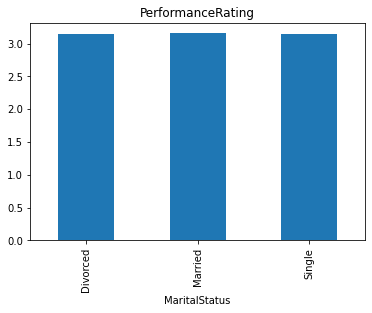

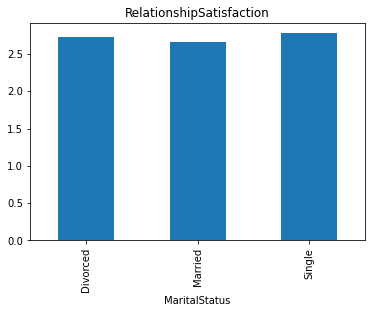

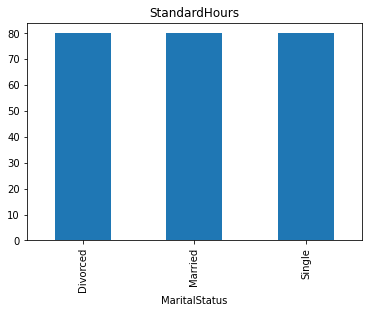

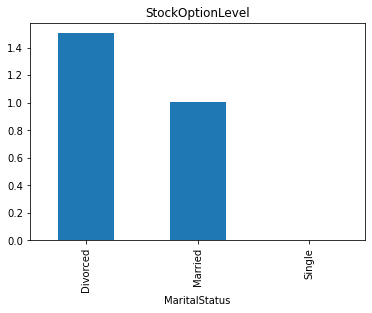

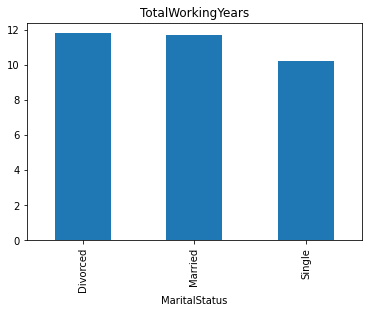

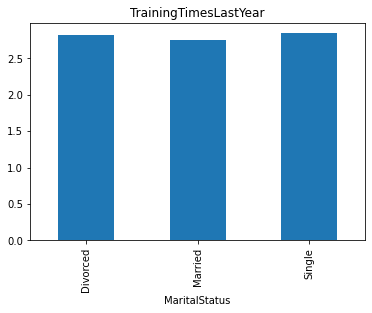

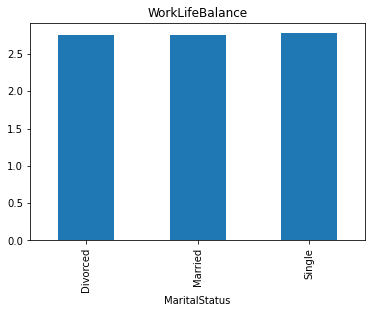

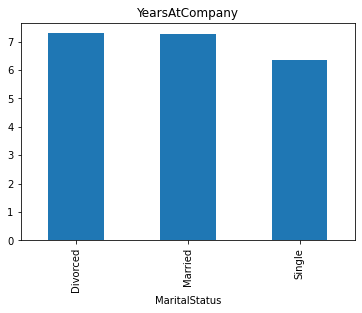

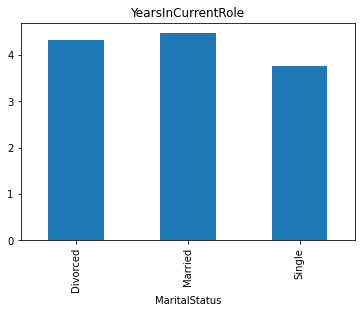

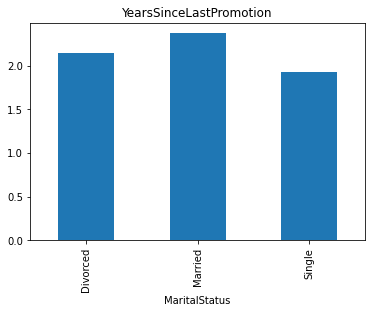

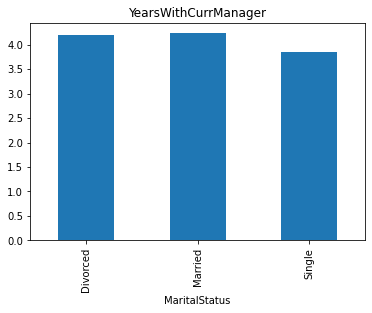

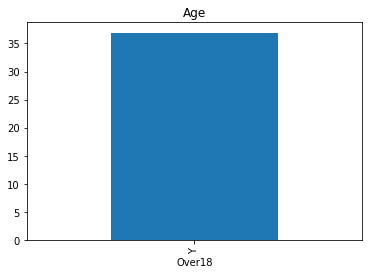

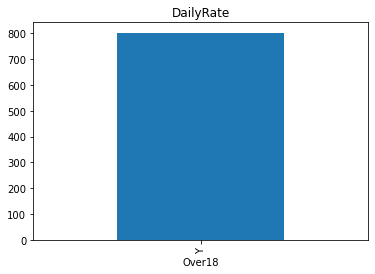

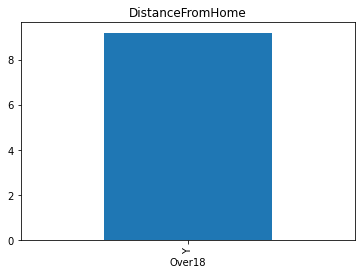

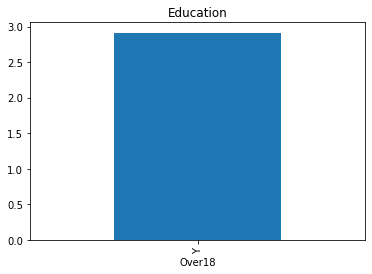

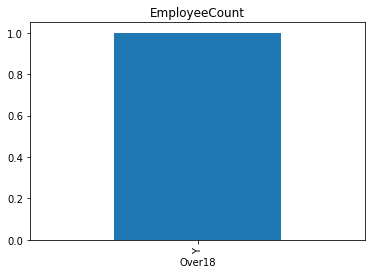

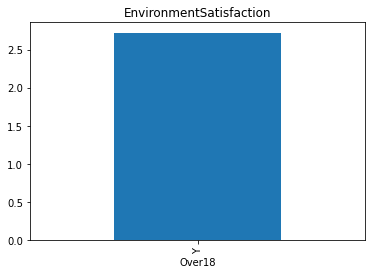

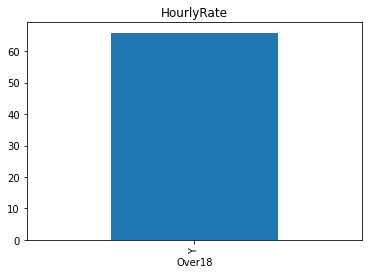

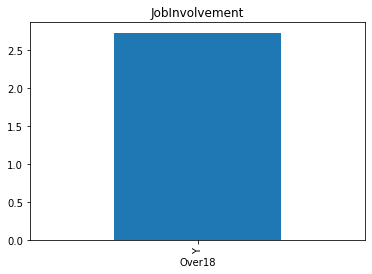

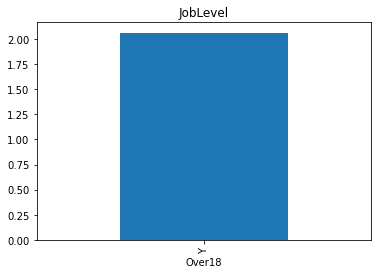

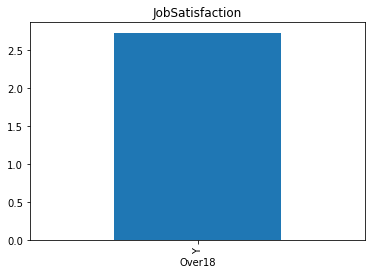

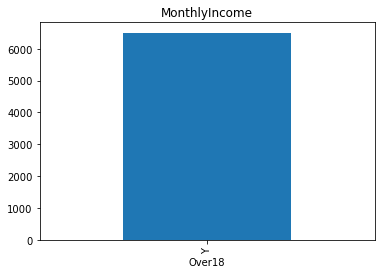

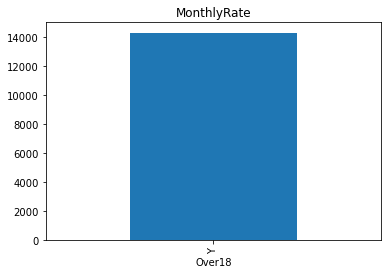

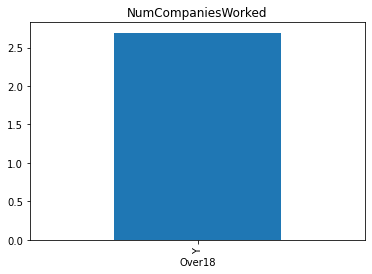

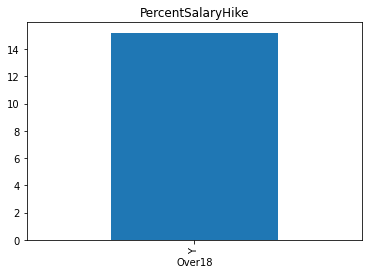

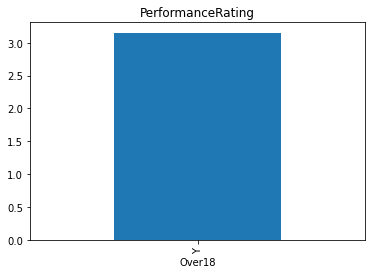

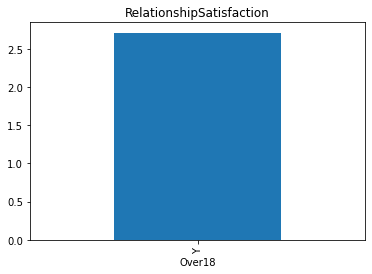

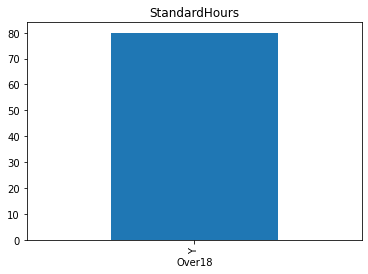

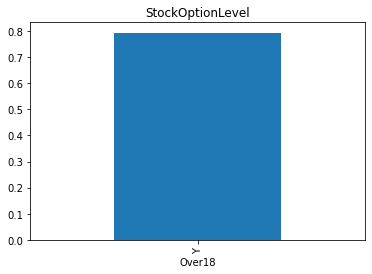

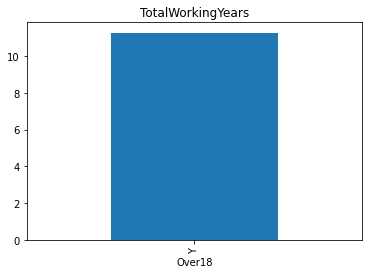

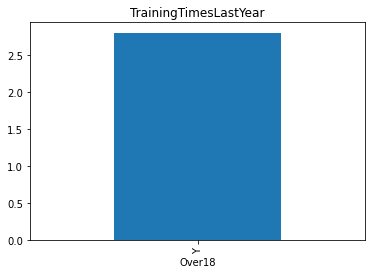

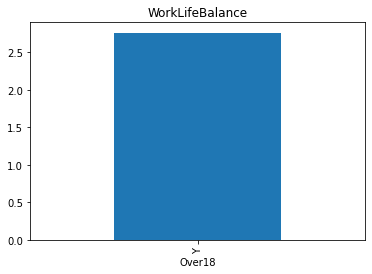

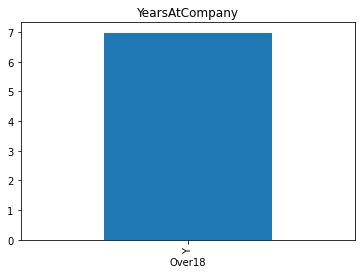

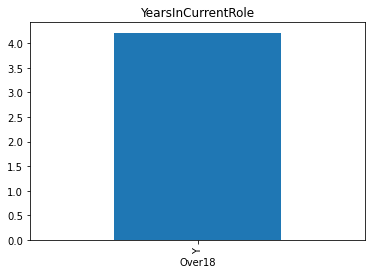

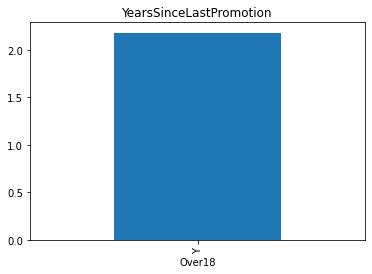

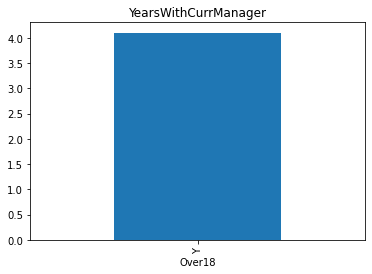

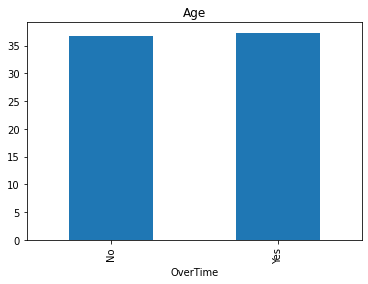

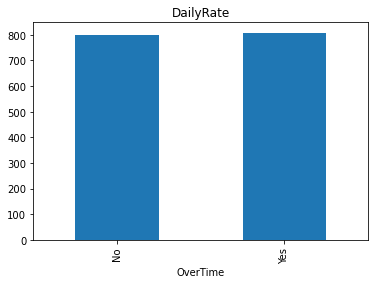

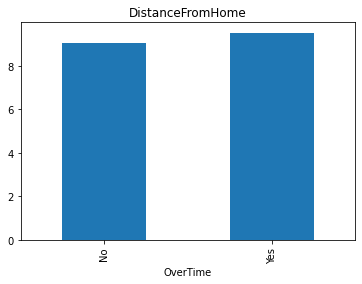

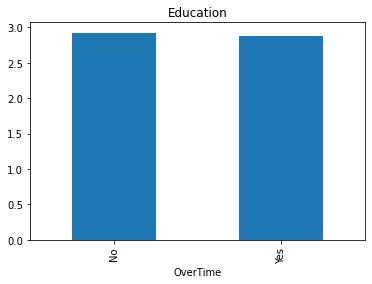

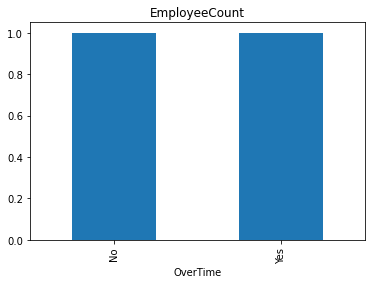

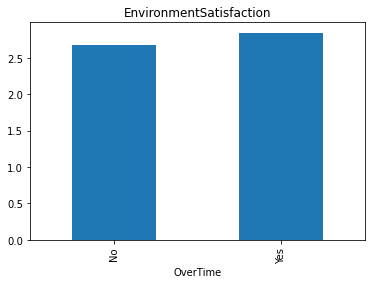

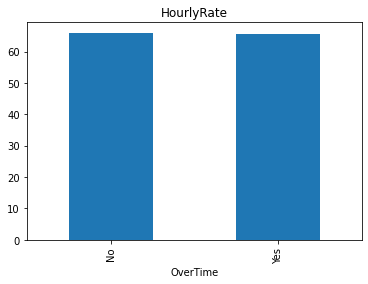

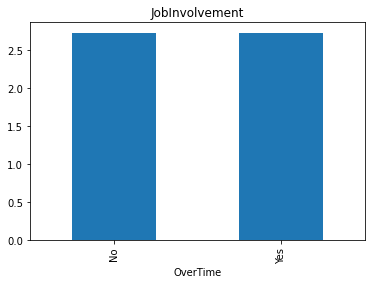

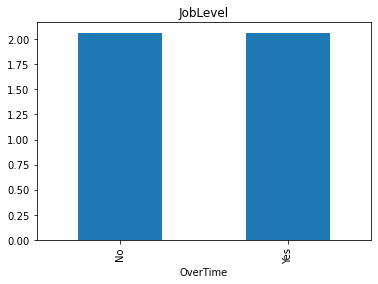

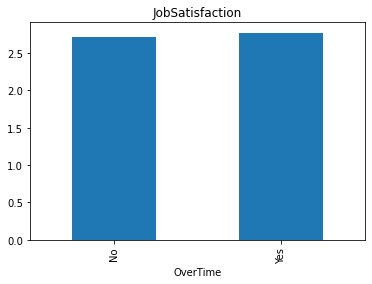

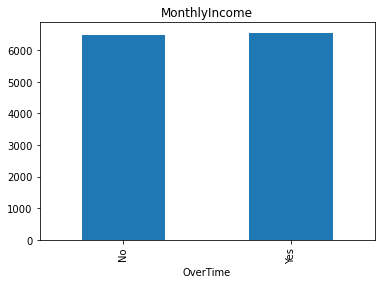

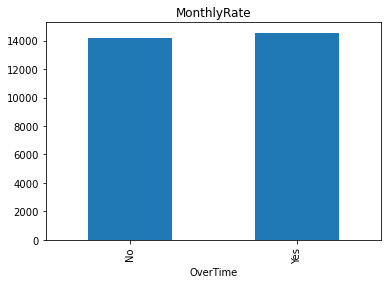

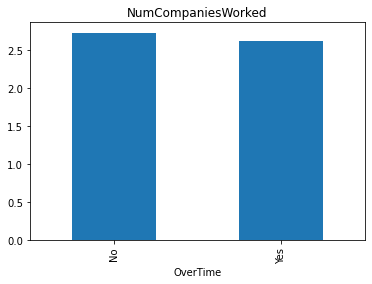

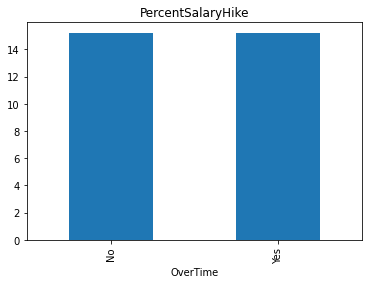

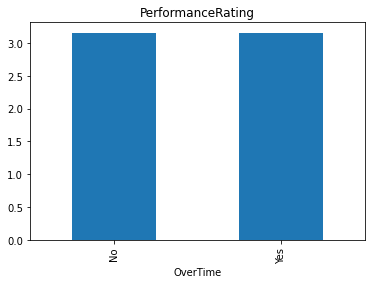

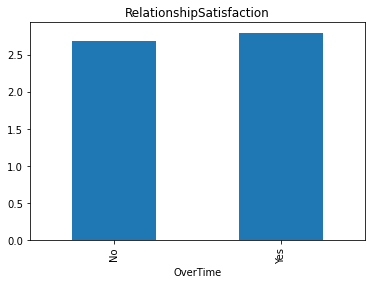

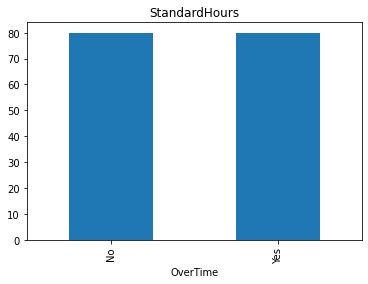

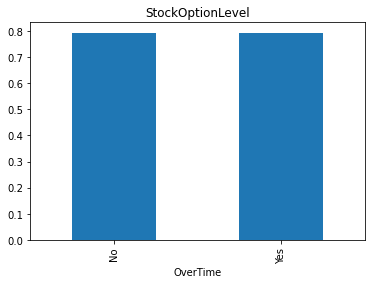

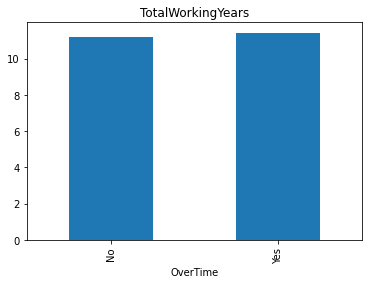

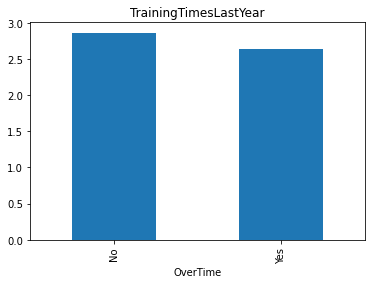

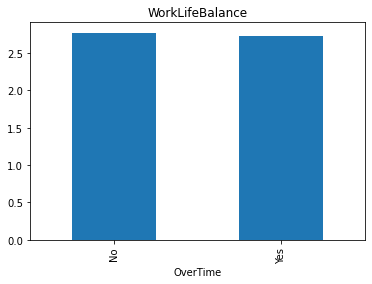

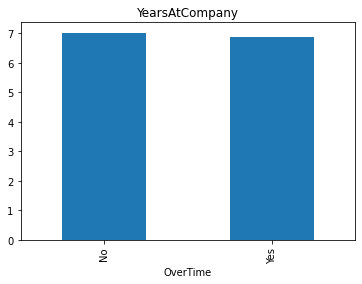

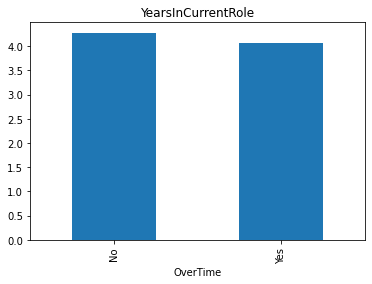

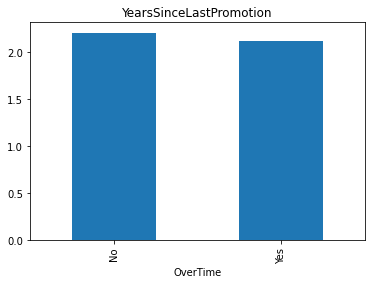

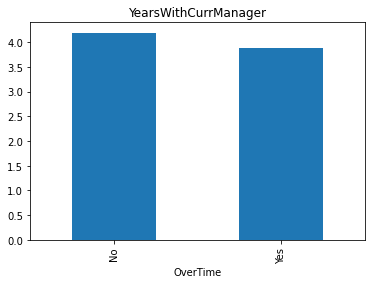

In [18]:
for cat_col in cat_cols:
    for num_col in num_cols:    
        df.groupby(cat_col)[num_col].mean().plot(kind='bar',title=num_col)
        plt.show()    


## Data processing and cleaning

In [19]:
df=pd.read_sql_table(r"HR_Employee_Attrition",engine_datahub)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:

num_cols=df.select_dtypes('number').drop(['EmployeeNumber'],axis=1).columns.tolist()

cat_cols=df.select_dtypes(object).drop(['Attrition','JobRole','EducationField'],axis=1).columns.tolist()

df[num_cols]=df[num_cols].clip(lower=df[num_cols].quantile(0.01), upper=df[num_cols].quantile(0.99),axis=1)

df=df.query('`Attrition`.notnull()',engine='python')

In [21]:
#replace mnissing value with median, a better representation of the center of the data if it's not normally ditributed

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
for col in num_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))



In [22]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for col in cat_cols:
    df[col]=imputer.fit_transform(df[col].values.reshape(-1, 1))

In [23]:
df.query('`Attrition`.notnull()',engine='python')

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0     41.0       Yes      Travel_Rarely     1102.0                   Sales               1.0        2.0  Life Sciences            1.0               1                      2.0  Female        94.0             3.0       2.0            Sales Executive              4.0        Single         5993.0      19479.0                 8.0      Y      Yes               11.0                3.0                       1.0           80.0               0.0                8.0                    0.0              1.0             6.0                 4.0                      0.0                   5.0
1     49.0        No  Travel_Frequently      279.0  Research & Development               8.0        1.0  Life Sciences            1.0               2                      3.0    Male        61.0             2.0       2.0         Research Scientist              2.0       Married         5130.0      24907.0                 1.0      Y       No               23.0                4.0                       4.0           80.0               1.0               10.0                    3.0              3.0            10.0                 7.0                      1.0                   7.0
2     37.0       Yes      Travel_Rarely     1373.0  Research & Development               2.0        2.0          Other            1.0               4                      4.0    Male        92.0             2.0       1.0      Laboratory Technician              3.0        Single         2090.0       2396.0                 6.0      Y      Yes               15.0                3.0                       2.0           80.0               0.0                7.0                    3.0              3.0             0.0                 0.0                      0.0                   0.0
3     33.0        No  Travel_Frequently     1392.0  Research & Development               3.0        4.0  Life Sciences            1.0               5                      4.0  Female        56.0             3.0       1.0         Research Scientist              3.0       Married         2909.0      23159.0                 1.0      Y      Yes               11.0                3.0                       3.0           80.0               0.0                8.0                    3.0              3.0             8.0                 7.0                      3.0                   0.0
4     27.0        No      Travel_Rarely      591.0  Research & Development               2.0        1.0        Medical            1.0               7                      1.0    Male        40.0             3.0       1.0      Laboratory Technician              2.0       Married         3468.0      16632.0                 9.0      Y       No               12.0                3.0                       4.0           80.0               1.0                6.0                    3.0              3.0             2.0                 2.0                      2.0                   2.0
...    ...       ...                ...        ...                     ...               ...        ...            ...            ...             ...                      ...     ...         ...             ...       ...                        ...              ...           ...            ...          ...                 ...    ...      ...                ...                ...                       ...            ...               ...                ...                    ...              ...             ... 

In [24]:
#check for missing values
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

In [25]:
#encode the attribute
def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop([each], axis=1)
    return df


# cat_cols.remove('Attrition')
df=one_hot(df,cat_cols)
df.head()

Age Attrition  DailyRate  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  Department_Human Resources  Department_Research & Development  Department_Sales  Gender_Female  Gender_Male  MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  Over18_Y  OverTime_No  OverTime_Yes
0  41.0       Yes     1102.0               1.0        2.0  Life Sciences            1.0               1                      2.0        94.0             3.0       2.0        Sales Executive              4.0         5993.0      19479.0                 8.0               11.0                3.0                       1.0           80.0               0.0                8.0                    0.0              1.0             6.0                 4.0                      0.0                   5.0                          0                                 0                             1                           0                                  0                 1              1            0                       0                      0                     1         1            0             1
1  49.0        No      279.0               8.0        1.0  Life Sciences            1.0               2                      3.0        61.0             2.0       2.0     Research Scientist              2.0         5130.0      24907.0                 1.0               23.0                4.0                       4.0           80.0               1.0               10.0                    3.0              3.0            10.0                 7.0                      1.0                   7.0                          0                                 1                             0                           0                                  1                 0              0            1                       0                      1                     0         1            1             0
2  37.0       Yes     1373.0               2.0        2.0          Other            1.0               4                      4.0        92.0             2.0       1.0  Laboratory Technician              3.0         2090.0       2396.0                 6.0               15.0                3.0                       2.0           80.0               0.0                7.0                    3.0              3.0             0.0                 0.0                      0.0                   0.0                          0                                 0                             1                           0                                  1                 0              0            1                       0                      0                     1         1            0             1
3  33.0        No     1392.0               3.0        4.0  Life Sciences            1.0               5                      4.0        56.0             3.0       1.0     Research Scientist              3.0         2909.0      23159.0                 1.0               11.0                3.0                       3.0           80.0               0.0                8.0                    3.0              3.0             8.0                 7.0                      3.0                   0.0                          0                                 1                             0                           0                                  1                 0              1            0                       0                      1                     0         1            0             1
4  2

In [26]:
item_list = df.columns.tolist()
item_list = [e for e in item_list if e not in ('Attrition','EmployeeNumber','JobRole','EducationField')]
item_list

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'Gender_Female',
 'Gender_Male',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Over18_Y',
 'OverTime_No',
 'OverTime_Yes']

In [27]:
#double check the data to see if there is any missing values and all categorical attributes have been encoded.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   float64
 1   Attrition                          1470 non-null   object 
 2   DailyRate                          1470 non-null   float64
 3   DistanceFromHome                   1470 non-null   float64
 4   Education                          1470 non-null   float64
 5   EducationField                     1470 non-null   object 
 6   EmployeeCount                      1470 non-null   float64
 7   EmployeeNumber                     1470 non-null   int64  
 8   EnvironmentSatisfaction            1470 non-null   float64
 9   HourlyRate                         1470 non-null   float64
 10  JobInvolvement                     1470 non-null   float64
 11  JobLevel                           1470 non-null   float

In [28]:
#For better performance use MinMaxScaler to scale and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_x =pd.DataFrame(scaler.fit_transform(df[item_list]),columns=item_list)

In [29]:
df_x

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  Department_Human Resources  Department_Research & Development  Department_Sales  Gender_Female  Gender_Male  MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  Over18_Y  OverTime_No  OverTime_Yes
0     0.559654   0.720029          0.000000       0.25            0.0                 0.333333    0.914286        0.666667      0.25         1.000000       0.252717     0.703631            0.888889           0.000000                0.0                  0.000000            0.0          0.000000           0.205882               0.000000         0.000000        0.193548            0.266667                 0.000000              0.357143                        0.0                               0.0                           1.0                         0.0                                0.0               1.0            1.0          0.0                     0.0                    0.0                   1.0       0.0          0.0           1.0
1     0.763165   0.118421          0.250000       0.00            0.0                 0.666667    0.442857        0.333333      0.25         0.333333       0.205414     0.926280            0.111111           0.857143                1.0                  1.000000            0.0          0.333333           0.264706               0.500000         0.666667        0.322581            0.466667                 0.071429              0.500000                        0.0                               1.0                           0.0                         0.0                                1.0               0.0            0.0          1.0                     0.0                    1.0                   0.0       0.0          1.0           0.0
2     0.457899   0.918129          0.035714       0.25            0.0                 1.000000    0.885714        0.333333      0.00         0.666667       0.038782     0.002909            0.666667           0.285714                0.0                  0.333333            0.0          0.000000           0.176471               0.500000         0.666667        0.000000            0.000000                 0.000000              0.000000                        0.0                               0.0                           1.0                         0.0                                1.0               0.0            0.0          1.0                     0.0                    0.0                   1.0       0.0          0.0           1.0
3     0.356143   0.932018          0.071429       0.75            0.0                 1.000000    0.371429        0.666667      0.00         0.666667       0.083674     0.854579            0.111111           0.000000                0.0                  0.666667            0.0          0.000000           0.205882               0.500000         0.666667        0.258065            0.466667                 0.214286              0.000000                        0.0                               1.0                           0.0                         0.0                                1.0               0.0            1.0          0.0                     0.0                    1.0                   0.0       0.0          0.0           1.0
4     0.203511   0.346491          0.035714       0.00            0.0                 0.000000    0.142857        0.666667      0.00         0.333333       0.114315     0.586851            1.000000           0.071429                0.0                  1.000000            0.0          0.333333  

In [30]:
df_y=np.where(df['Attrition']=='No',0,1)    

In [31]:
df_y

array([1, 0, 1, ..., 0, 0, 0])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score


                   
#splitting the principal training dataset to subtrain and subtest datasets
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = .3)

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()

logit.fit(x_train, y_train)

predictions = logit.predict(x_test)
probabilities = logit.predict_proba(x_test)
    
print('Algorithm:', type(logit).__name__)
print("\nClassification report:\n", classification_report(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions))

Algorithm: LogisticRegression

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       371
           1       0.66      0.44      0.53        70

    accuracy                           0.88       441
   macro avg       0.78      0.70      0.73       441
weighted avg       0.86      0.88      0.86       441

Accuracy Score: 0.8752834467120182


In [33]:
#confusion matrix
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.offline as py
conf_matrix = confusion_matrix(y_test, predictions)

trace=go.Heatmap(z = conf_matrix,x = ["0", "1"],y = ["0", "1"],showscale = False, colorscale = "Picnic")
fig = make_subplots()
fig.add_trace(trace)
py.iplot(fig)

In [34]:
column_df = pd.DataFrame(x_train.columns.tolist())
coefficients = pd.DataFrame(logit.coef_.ravel())
coef_sumry = (pd.merge(coefficients, column_df, left_index=True, 
                               right_index=True, how="left"))
coef_sumry.columns = ["coefficients", "features"]
coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending=False)
display(coef_sumry)
trace = go.Bar(x = coef_sumry["features"], y = coef_sumry["coefficients"])


fig = make_subplots()
fig.add_trace(trace)
py.iplot(fig)

coefficients                           features
23      1.778485            YearsSinceLastPromotion
12      1.614920                 NumCompaniesWorked
2       1.127864                   DistanceFromHome
38      0.924120                       OverTime_Yes
35      0.588233               MaritalStatus_Single
26      0.551714   BusinessTravel_Travel_Frequently
28      0.465981         Department_Human Resources
14      0.230227                  PerformanceRating
21      0.167545                     YearsAtCompany
32      0.157161                        Gender_Male
30      0.101587                   Department_Sales
11      0.079078                        MonthlyRate
27      0.048564       BusinessTravel_Travel_Rarely
6       0.017668                         HourlyRate
16      0.000000                      StandardHours
36      0.000000                           Over18_Y
4       0.000000                      EmployeeCount
3      -0.031105                          Education
31     -0.156245                      Gender_Female
34     -0.240116              MaritalStatus_Married
33     -0.347201             MaritalStatus_Divorced
1      -0.439231                          DailyRate
13     -0.531374                  PercentSalaryHike
29     -0.566652  Department_Research & Development
25     -0.599362          BusinessTravel_Non-Travel
20     -0.692617                    WorkLifeBalance
17     -0.710103                   StockOptionLevel
15     -0.716060           RelationshipSatisfaction
10     -0.717393                      MonthlyIncome
22     -0.797105                 YearsInCurrentRole
19     -0.863795              TrainingTimesLastYear
37     -0.923204                        OverTime_No
0      -0.993789                                Age
9      -1.073871                    JobSatisfaction
5      -1.095668            EnvironmentSatisfaction
24     -1.151182               YearsWithCurrManager
7      -1.236917                     JobInvolvement
18     -1.254359                  TotalWorkingYears
8      -1.330548                           JobLevel

### Interpret the results:
<!-- An Accuracy Score of 0.96 on Test data is a very good score with 1 being perfect 100% correct prediction. 
From the confusion Matrix we know that out of 194 predictions, only 7 mistake. Area under curve(True Positive/ False Positive), 
another model performance metric which often is used for unbalanced samples, is 0.965, also near perfect. 
The Feature Importance chart  suggests that  Money_Values, PARA_B, PARA_A, Score and District_Loss are more powerful predictors for Risk. 
 -->
<!-- Overall we have a very good model that can predict Risk. -->

# Productization of your Insights/Recommendations

In [35]:
df=pd.read_sql_table(r"HR_Employee_Attrition",engine_datahub)
df.head()


# limitPer = len(df) * .80
# df = df.dropna(thresh=limitPer, axis=1)

# limitPer=df.shape[1] * .50
# df = df.dropna(thresh=limitPer, axis=0)
                  


Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes      Travel_Rarely       1102                   Sales                 1          2  Life Sciences              1               1                        2  Female          94               3         2        Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                         1             80                 0                  8                      0                1               6                   4                        0                     5
1   49        No  Travel_Frequently        279  Research & Development                 8          1  Life Sciences              1               2                        3    Male          61               2         2     Research Scientist                2       Married           5130        24907                   1      Y       No                 23                  4                         4             80                 1                 10                      3                3              10                   7                        1                     7
2   37       Yes      Travel_Rarely       1373  Research & Development                 2          2          Other              1               4                        4    Male          92               2         1  Laboratory Technician                3        Single           2090         2396                   6      Y      Yes                 15                  3                         2             80                 0                  7                      3                3               0                   0                        0                     0
3   33        No  Travel_Frequently       1392  Research & Development                 3          4  Life Sciences              1               5                        4  Female          56               3         1     Research Scientist                3       Married           2909        23159                   1      Y      Yes                 11                  3                         3             80                 0                  8                      3                3               8                   7                        3                     0
4   27        No      Travel_Rarely        591  Research & Development                 2          1        Medical              1               7                        1    Male          40               3         1  Laboratory Technician                2       Married           3468        16632                   9      Y       No                 12                  3                         4             80                 1                  6                      3                3               2                   2                        2                     2

In [36]:
df['probabily'] = logit.predict_proba(df_x)[:,1]
df.sort_values(by='probabily',ascending=False).head(50)


Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education    EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  probabily
798    33       Yes      Travel_Rarely       1017  Research & Development                25          3           Medical              1            1108                        1    Male          55               2         1         Research Scientist                2        Single           2313         2993                   4      Y      Yes                 20                  4                         2             80                 0                  5                      0                3               2                   2                        2                     2   0.959094
1060   24       Yes  Travel_Frequently        381  Research & Development                 9          3           Medical              1            1494                        2    Male          89               3         1      Laboratory Technician                1        Single           3172        16998                   2      Y      Yes                 11                  3                         3             80                 0                  4                      2                2               0                   0                        0                     0   0.927254
911    25       Yes  Travel_Frequently        599                   Sales                24          1     Life Sciences              1            1273                        3    Male          73               1         1       Sales Representative                4        Single           1118         8040                   1      Y      Yes                 14                  3                         4             80                 0                  1                      4                3               1                   0                        1                     0   0.913181
357    21       Yes  Travel_Frequently        756                   Sales                 1          1  Technical Degree              1             478                        1  Female          99               2         1       Sales Representative                2        Single           2174         9150                   1      Y      Yes                 11                  3                         3             80                 0                  3                      3                3               3                   2                        1                     2   0.912124
1396   53       Yes      Travel_Rarely       1168                   Sales                24          4     Life Sciences              1            1968                        1    Male          66               3         3            Sales Executive                1        Single          10448         5843                   6      Y      Yes                 13                  3                         2             80                 0                 15                      2                2               2                   2                        2                     2   0.896752
688    19       Yes      Travel_Rarely        419                   Sales                21          3             Other              1             959                        4    Male          37               2         1       Sales Representative                2        Single           2121         9947                   1      Y      Yes                 13                  3                         2             80             

In [37]:
import pyodbc
import urllib
import sqlalchemy

'''connect to datahub'''

params_datahub = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                 "SERVER=localhost\SQLEXPRESS;"
                                 "DATABASE=datahub;"
                                 "UID=sa;"
                                 "PWD=user1")

engine_datahub = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params_datahub))
# df=df.drop('Purpose_other',axis=1)
df.to_sql('HR_prediction',engine_datahub,if_exists='replace')